# Early-Stage Alzheimer's Disease Prediction

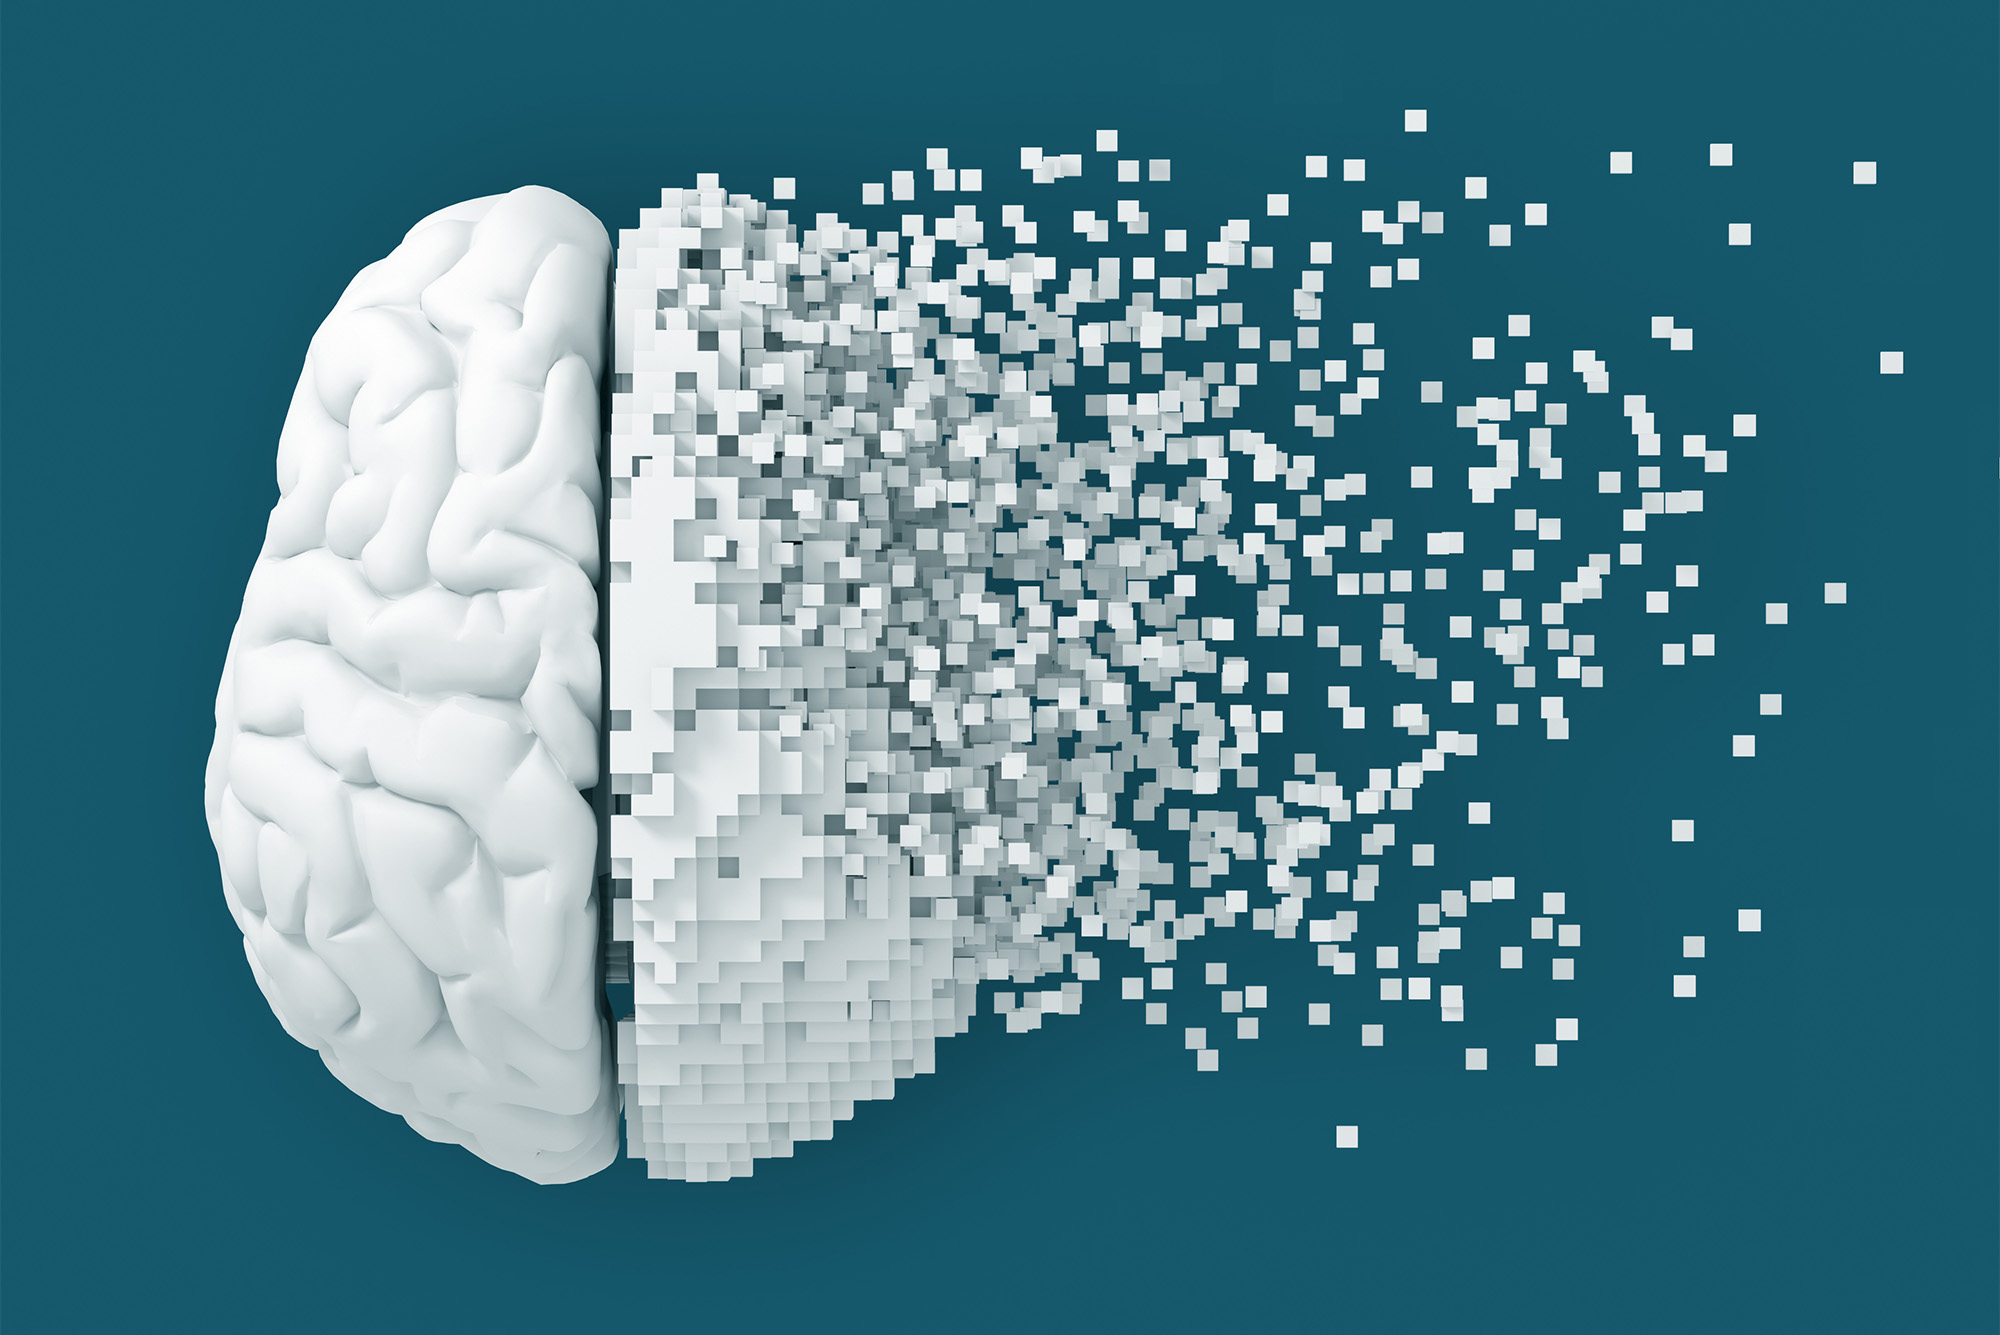

Alzheimer’s disease (AD) is characterized by the accumulation of amyloid plaques and neurofibrillary tangles in the brain, leading to progressive neuronal damage and cognitive decline. Symptoms often begin with memory loss and confusion, eventually impacting language, reasoning, and daily functioning. Despite extensive research, there is currently no cure for AD, making early detection and management critical for improving patient outcomes.








Alzheimer’s disease (AD) is a widespread neurodegenerative condition affecting over 32 million people globally. It typically begins with an asymptomatic stage, progressing to mild cognitive impairment (MCI) before full-blown AD. Early diagnosis is crucial for managing the disease effectively, but current biomarkers like medial temporal atrophy detected by MRI scans are often insufficient in the earliest stages. Machine learning (ML) offers promising solutions for early diagnosis by analyzing structural MRI data. Recent ML models have shown high accuracy in distinguishing between healthy individuals, those with MCI, and those with AD. By using advanced techniques, including graph theory features and multiple data sets, these ML tools can improve diagnostic precision, making early intervention more feasible. This innovative approach combines complexity and interpretability, ensuring that the diagnostic insights are both powerful and useful for clinicians.

Early and accurate diagnosis of Alzheimer’s disease (AD) is essential for disease management and therapeutic choices that can delay disease progression. Machine learning (ML) approaches have been extensively used in attempts to develop algorithms for reliable early diagnosis of AD, although clinical usefulness, interpretability, and generalizability of the classifiers across datasets and MRI protocols remain limited.

Data used in the preparation of this project was obtained from the publicly available Open Access Series of Imaging Studies (OASIS) project database
taken from kaggle https://www.kaggle.com/code/pawelkauf/filling-the-gaps-exploring-alzheimer-s-data/input?select=oasis_longitudinal.csv


### Dataset Overview

1. Subject ID: Unique identifier for each individual. This is typically used to distinguish between different records and should not be used as a feature in your predictive model.


2. MRI ID: A unique identifier for each MRI scan, ensuring that each scan can be accurately linked to the correct subject and visit.


3. Group: The diagnostic category of the subject:
    1: Dementia 
    2: Non-dementia   
    3: Converted (patients who transitioned from non-dementia to dementia) 
    
    
  

4. Visit: The number of times the patient has visited for evaluations. This helps in tracking changes over multiple sessions in longitudinal studies.

5. MR Delay: The time delay (in days) between the baseline visit and the MRI scan, accounting for any timing discrepancies that might affect the analysis.

7. M/F (Gender): Indicates the gender of the individual, with 'M' representing male and 'F' representing female. Gender can be a significant factor in the analysis of Alzheimer's disease.

8. Hand (Handedness): Indicates whether the individual is left-handed or right-handed. Handedness can sometimes be linked to brain lateralization and cognitive function.

9. Age: The age of the individual in years. Age is a critical factor in Alzheimer's research since the risk of developing Alzheimer's disease increases with age.

10. EDUC (Years of Education): Number of years of formal education. Education level has been studied as a potential protective factor against Alzheimer's disease, with higher education levels often associated with a lower risk.

11. SES (Socioeconomic Status): This is typically a categorical variable indicating the individual's socioeconomic status. SES can influence health outcomes and access to healthcare resources, which can impact Alzheimer's disease progression. (ordinal categorical: 1, 2, 3, 4, 5).

12. MMSE (Mini-Mental State Examination): A widely used test of cognitive function among the elderly. It includes tests of orientation, attention, memory, language, and visual-spatial skills. The MMSE score is often used to screen for cognitive impairment.Lower scores indicate greater cognitive impairment.

13. CDR (Clinical Dementia Rating): A numeric scale used to quantify the severity of symptoms of dementia (0, 0.5, 1, 2, or 3). It assesses six domains: memory, orientation, judgment & problem-solving, community affairs, home & hobbies, and personal care. Lower scores indicate normal or mild cognitive impairment, while higher scores indicate more severe dementia.
    0: No dementia
    0.5: Very mild dementia
    1: Mild dementia
    2: Moderate dementia
    3: Severe dementia

14. eTIV (Estimated Total Intracranial Volume): An estimate of the total volume inside the skull(in cubic millimeters or other volumetric units). It is often used in neuroimaging studies to normalize brain volume measurements and account for differences in head size.

15. nWBV (Normalized Whole Brain Volume): The volume of the whole brain normalized to the individual's intracranial volume. This measure can help in comparing brain volumes across individuals with different head sizes and is important in studying brain atrophy associated with Alzheimer's disease,indicating the proportion of the intracranial volume occupied by the brain.

16. ASF: Atlas Scaling Factor, a numerical factor used to align MRI images to a standard template(atlas). It helps to standardize measurements across different individuals and imaging studies. It typically ranges from values close to 1, representing minimal scaling, to higher values indicating more significant adjustments.



## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score , f1_score ,classification_report, confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
pd.options.display.max_columns = None

## Loading the Dataset

In [3]:
df=pd.read_csv('oasis_longitudinal.csv')
df

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

### DATA DESCRIPTION

In [4]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [5]:
info_dict={
    'Columns':df.columns.to_list(),
    'Not_null_counts':df.count().to_list(),
    'Dtype':df.dtypes.to_list(),
    'Null_Percentage':np.round((373-df.count())*100/373)  
}
Data_description=pd.DataFrame(info_dict).reset_index(drop=True)
Data_description

Columns  Not_null_counts    Dtype  Null_Percentage
0   Subject ID              373   object              0.0
1       MRI ID              373   object              0.0
2        Group              373   object              0.0
3        Visit              373    int64              0.0
4     MR Delay              373    int64              0.0
5          M/F              373   object              0.0
6         Hand              373   object              0.0
7          Age              373    int64              0.0
8         EDUC              373    int64              0.0
9          SES              354  float64              5.0
10        MMSE              371  float64              1.0
11         CDR              373  float64              0.0
12        eTIV              373    int64              0.0
13        nWBV              373  float64              0.0
14         ASF              373  float64              0.0

# Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        3.1.6) Finding the proportion of binary class of target varibale to make the data is balanced
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1 Head of the dataset

In [6]:
df.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

### 3.1.2. The shape of the dataset

In [7]:
df.shape

(373, 15)

### 3.1.3. List types of all columns

In [8]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

### 3.1.4. Info of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


### 3.1.5. Summary of the dataset

In [10]:
df.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

### 3.1.6. Finding the proportion of binary class of target varibale to check whether the data is balanced

In [11]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [12]:
df.Group.value_counts(normalize=True)*100

Group
Nondemented    50.938338
Demented       39.142091
Converted       9.919571
Name: proportion, dtype: float64

#### Data is Imbalanced

## 3.2 Data Cleaning

### 3.2.1. Checking the Duplicates

In [13]:
df[df.duplicated]

Empty DataFrame
Columns: [Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []

No duplicates

### 3.2.2 Checking null values

In [14]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [15]:
df[df.SES.isnull()]

Subject ID         MRI ID     Group  Visit  MR Delay M/F Hand  Age  EDUC  \
2    OAS2_0002  OAS2_0002_MR1  Demented      1         0   M    R   75    12   
3    OAS2_0002  OAS2_0002_MR2  Demented      2       560   M    R   76    12   
4    OAS2_0002  OAS2_0002_MR3  Demented      3      1895   M    R   80    12   
10   OAS2_0007  OAS2_0007_MR1  Demented      1         0   M    R   71    16   
11   OAS2_0007  OAS2_0007_MR3  Demented      3       518   M    R   73    16   
12   OAS2_0007  OAS2_0007_MR4  Demented      4      1281   M    R   75    16   
134  OAS2_0063  OAS2_0063_MR1  Demented      1         0   F    R   80    12   
135  OAS2_0063  OAS2_0063_MR2  Demented      2       490   F    R   81    12   
207  OAS2_0099  OAS2_0099_MR1  Demented      1         0   F    R   80    12   
208  OAS2_0099  OAS2_0099_MR2  Demented      2       807   F    R   83    12   
237  OAS2_0114  OAS2_0114_MR1  Demented      1         0   F    R   76    12   
238  OAS2_0114  OAS2_0114_MR2  Demented      2       570   F    R   78    12   
322  OAS2_0160  OAS2_0160_MR1  Demented      1         0   M    R   76    12   
323  OAS2_0160  OAS2_0160_MR2  Demented      2       552   M    R   78    12   
356  OAS2_0181  OAS2_0181_MR1  Demented      1         0   F    R   74    12   
357  OAS2_0181  OAS2_0181_MR2  Demented      2       539   F    R   75    12   
358  OAS2_0181  OAS2_0181_MR3  Demented      3      1107   F    R   77    12   
359  OAS2_0182  OAS2_0182_MR1  Demented      1         0   M    R   73    12   
360  OAS2_0182  OAS2_0182_MR2  Demented      2       776   M    R   75    12   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
2    NaN  23.0  0.5  1678  0.736  1.046  
3    NaN  28.0  0.5  1738  0.713  1.010  
4    NaN  22.0  0.5  1698  0.701  1.034  
10   NaN  28.0  0.5  1357  0.748  1.293  
11   NaN  27.0  1.0  1365  0.727  1.286  
12   NaN  27.0  1.0  1372  0.710  1.279  
134  NaN  30.0  0.5  1430  0.737  1.228  
135  NaN  27.0  0.5  1453  0.721  1.208  
207  NaN  27.0  0.5  1475  0.762  1.190  
208  NaN  23.0  0.5  1484  0.750  1.183  
237  NaN  27.0  0.5  1316  0.727  1.333  
238  NaN  27.0  1.0  1309  0.709  1.341  
322  NaN  27.0  0.5  1557  0.705  1.127  
323  NaN  29.0  1.0  1569  0.704  1.119  
356  NaN  26.0  0.5  1171  0.733  1.499  
357  NaN   NaN  1.0  1169  0.742  1.501  
358  NaN   NaN  1.0  1159  0.733  1.515  
359  NaN  23.0  0.5  1661  0.698  1.056  
360  NaN  20.0  0.5  1654  0.696  1.061

In [16]:
df.SES.value_counts()

SES
2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: count, dtype: int64

In [17]:
df.SES.mode()

0    2.0
Name: SES, dtype: float64

In [18]:
df.SES.fillna(df.SES.mode()[0],inplace=True)

In [19]:
df[df.SES.isnull()]

Empty DataFrame
Columns: [Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []

In [20]:
df.MMSE.isnull().sum()

2

In [21]:
df.MMSE.value_counts()

MMSE
30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
21.0     11
23.0     11
22.0      7
20.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: count, dtype: int64

In [22]:
df.MMSE.mode()

0    30.0
Name: MMSE, dtype: float64

In [23]:
df.MMSE.fillna(df.MMSE.mode()[0],inplace=True)

In [24]:
df[df.MMSE.isnull()]

Empty DataFrame
Columns: [Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []

#### The data is clean, with no duplicate or null values observed

In [25]:
df['MR Delay'].dtype

dtype('int64')

In [26]:
df['MR_Delay_Timedelta'] = pd.to_timedelta(df['MR Delay'], unit='m')

In [27]:
df

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0      14  2.0  27.0  0.0  1987  0.696  0.883    0 days 00:00:00  
1      14  2.0  30.0  0.0  2004  0.681  0.876    0 days 07:37:00  
2      12  2.0  23.0  0.5  1678  0.736  1.046    0 days 00:00:00  
3      12  2.0  28.0  0.5  1738  0.713  1.010    0 days 09:20:00  
4      12  2.0  22.0  0.5  1698  0.701  1.034    1 days 07:35:00  
..    ...  ...   ...  ...   ...    ...    ...                ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037    0 days 14:02:00  
369    16  1.0  26.0  0.5  1688  0.675  1.040    1 days 14:17:00  
370    13  2.0  30.0  0.0  1319  0.801  1.331    0 days 00:00:00  
371    13  2.0  30.0  0.0  1327  0.796  1.323    0 days 12:43:00  
372    13  2.0  30.0  0.0  1333  0.801  1.317    1 days 02:48:00  

[373 rows x 16 columns]

In [28]:
df['MR Delay']=df['MR Delay']/60

In [29]:
df.head()

Subject ID         MRI ID        Group  Visit   MR Delay M/F Hand  Age  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1   0.000000   M    R   87   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2   7.616667   M    R   88   
2  OAS2_0002  OAS2_0002_MR1     Demented      1   0.000000   M    R   75   
3  OAS2_0002  OAS2_0002_MR2     Demented      2   9.333333   M    R   76   
4  OAS2_0002  OAS2_0002_MR3     Demented      3  31.583333   M    R   80   

   EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0    14  2.0  27.0  0.0  1987  0.696  0.883    0 days 00:00:00  
1    14  2.0  30.0  0.0  2004  0.681  0.876    0 days 07:37:00  
2    12  2.0  23.0  0.5  1678  0.736  1.046    0 days 00:00:00  
3    12  2.0  28.0  0.5  1738  0.713  1.010    0 days 09:20:00  
4    12  2.0  22.0  0.5  1698  0.701  1.034    1 days 07:35:00

In [30]:
df.to_csv("alzheimer's disease EDA.csv")

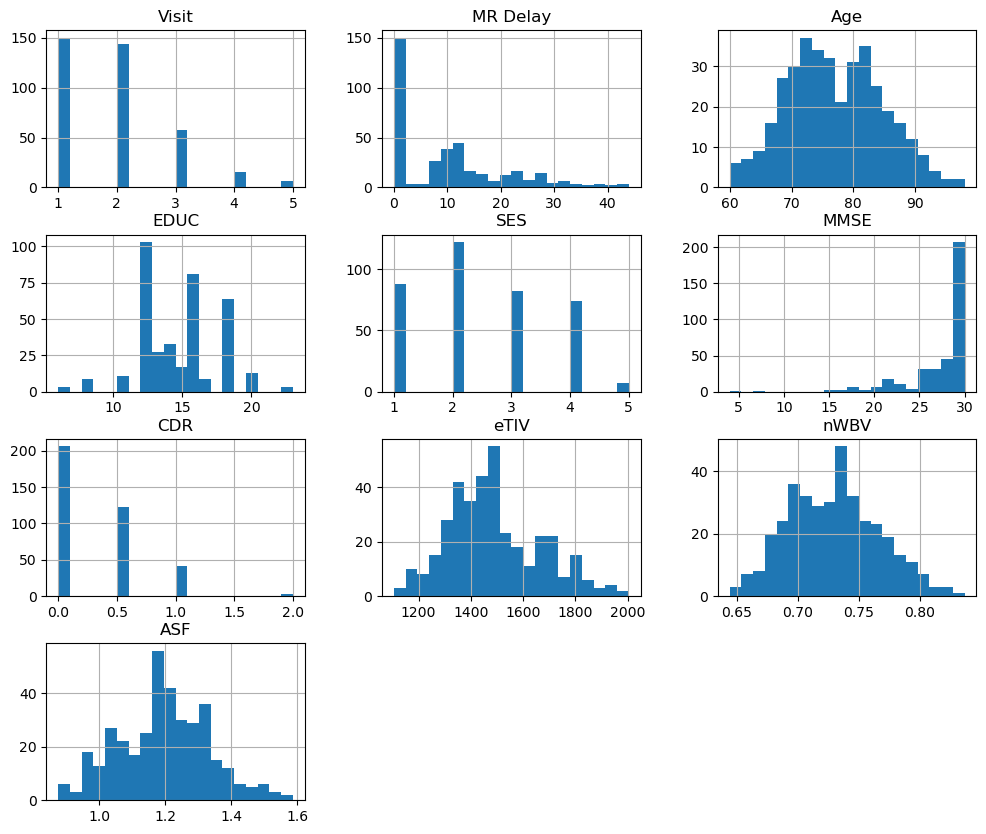

In [32]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

### Analyzing numerical features

In [33]:
df.head()

Subject ID         MRI ID        Group  Visit   MR Delay M/F Hand  Age  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1   0.000000   M    R   87   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2   7.616667   M    R   88   
2  OAS2_0002  OAS2_0002_MR1     Demented      1   0.000000   M    R   75   
3  OAS2_0002  OAS2_0002_MR2     Demented      2   9.333333   M    R   76   
4  OAS2_0002  OAS2_0002_MR3     Demented      3  31.583333   M    R   80   

   EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0    14  2.0  27.0  0.0  1987  0.696  0.883    0 days 00:00:00  
1    14  2.0  30.0  0.0  2004  0.681  0.876    0 days 07:37:00  
2    12  2.0  23.0  0.5  1678  0.736  1.046    0 days 00:00:00  
3    12  2.0  28.0  0.5  1738  0.713  1.010    0 days 09:20:00  
4    12  2.0  22.0  0.5  1698  0.701  1.034    1 days 07:35:00

MR Delay
201
Axes(0.125,0.11;0.775x0.77)


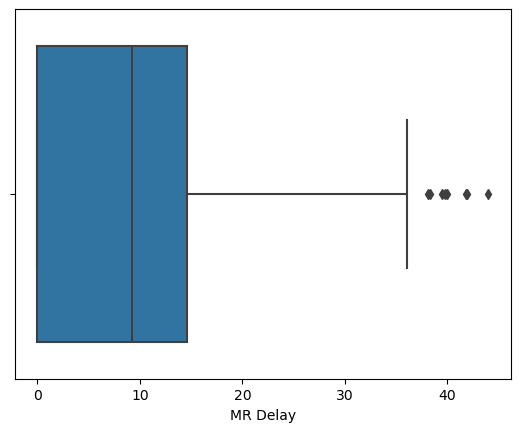

Axes(0.125,0.11;0.775x0.77)


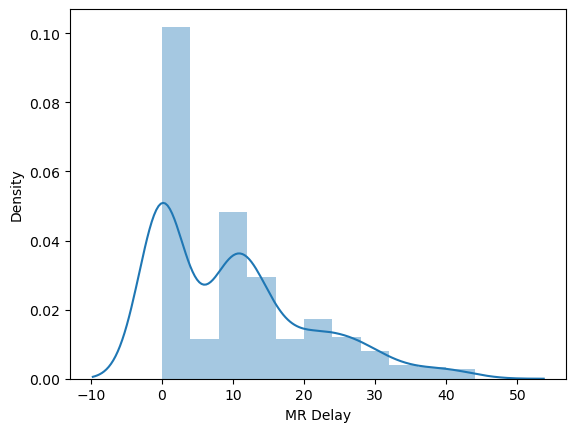

Age
39
Axes(0.125,0.11;0.775x0.77)


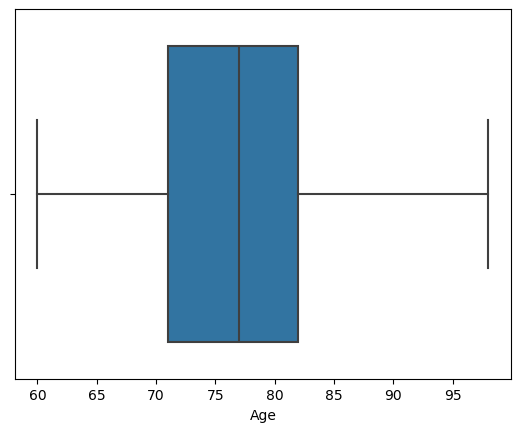

Axes(0.125,0.11;0.775x0.77)


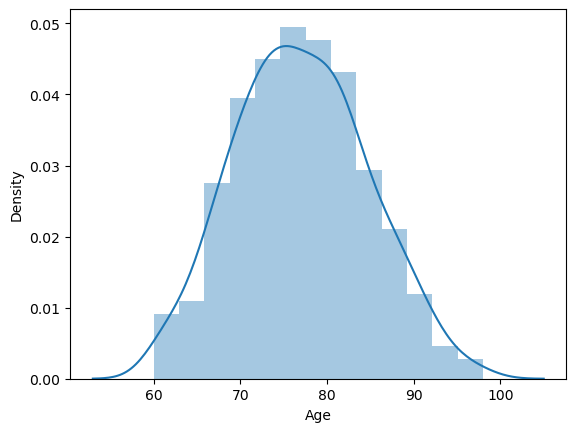

eTIV
286
Axes(0.125,0.11;0.775x0.77)


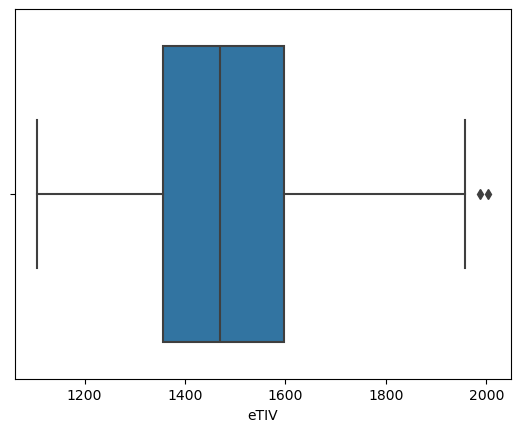

Axes(0.125,0.11;0.775x0.77)


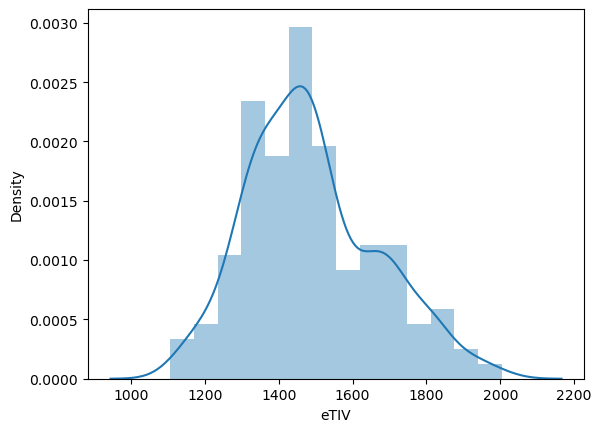

nWBV
136
Axes(0.125,0.11;0.775x0.77)


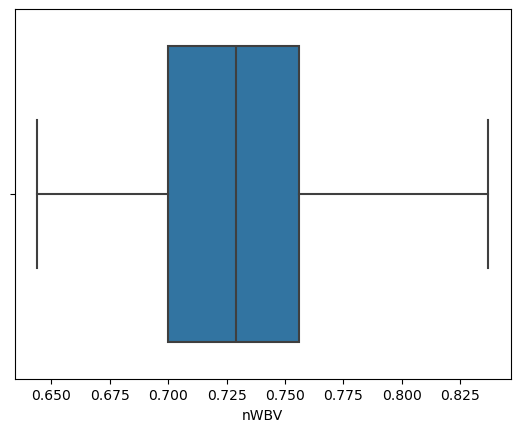

Axes(0.125,0.11;0.775x0.77)


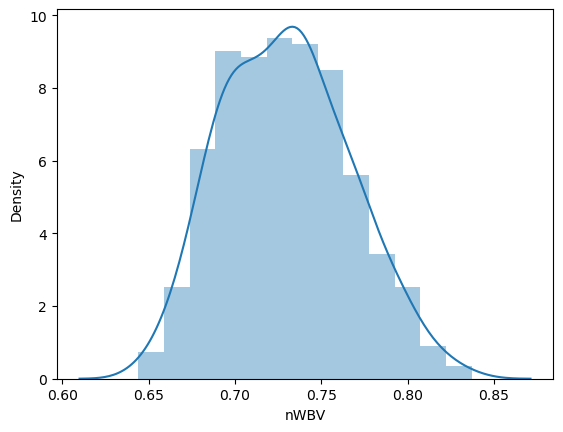

ASF
265
Axes(0.125,0.11;0.775x0.77)


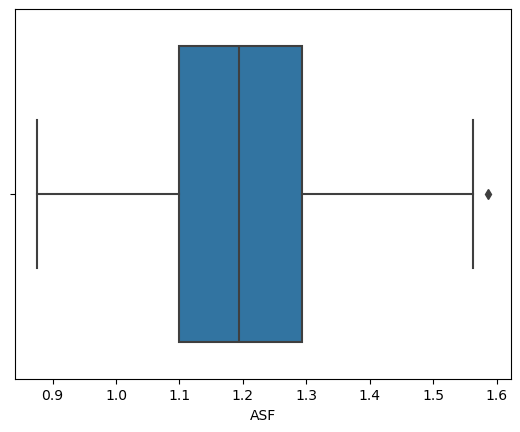

Axes(0.125,0.11;0.775x0.77)


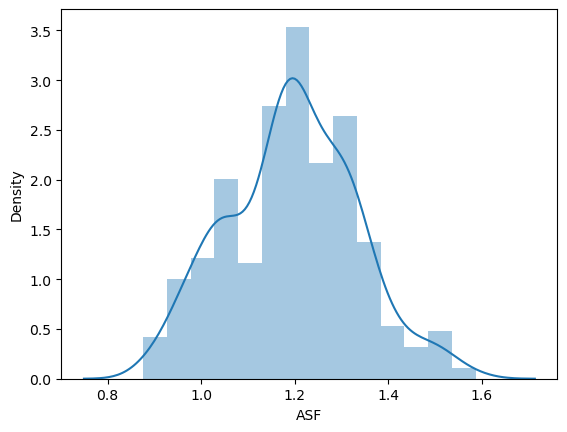

In [34]:
num=['MR Delay','Age','eTIV','nWBV','ASF']
num
for i in num:
    print(i)
    print(df[i].nunique())
    print(sns.boxplot(x=df[i]))
    plt.show()
    print(sns.distplot(df[i]))
    plt.show()



Subject ID
Subject ID
OAS2_0070    5
OAS2_0048    5
OAS2_0127    5
OAS2_0073    5
OAS2_0034    4
            ..
OAS2_0071    2
OAS2_0069    2
OAS2_0068    2
OAS2_0066    2
OAS2_0092    2
Name: count, Length: 150, dtype: int64
Axes(0.125,0.11;0.775x0.77)


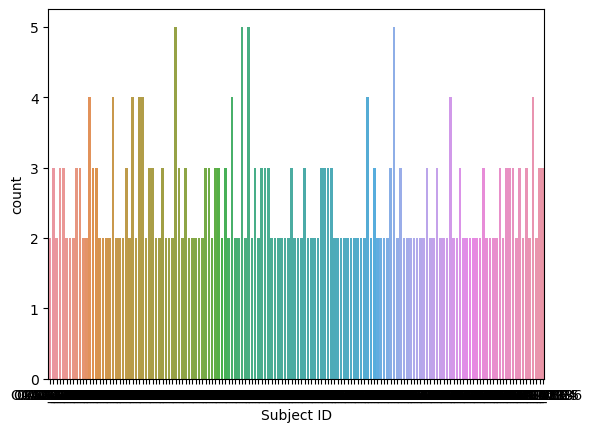

Group
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


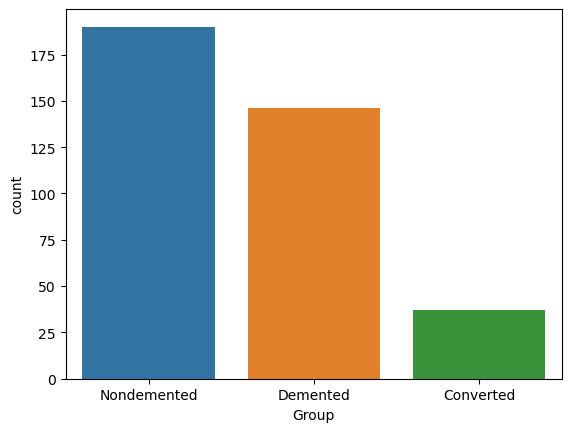

Visit
Visit
1    150
2    144
3     58
4     15
5      6
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


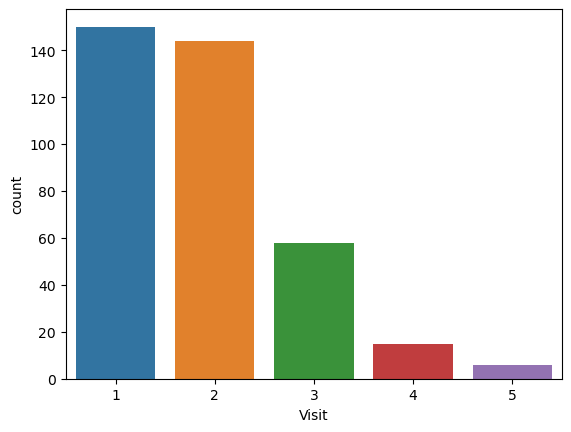

M/F
M/F
F    213
M    160
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


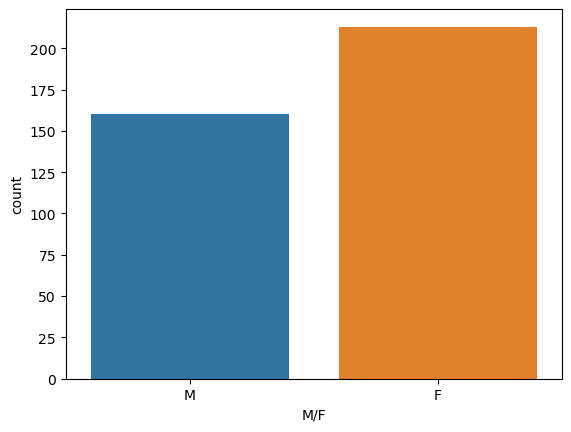

Hand
Hand
R    373
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


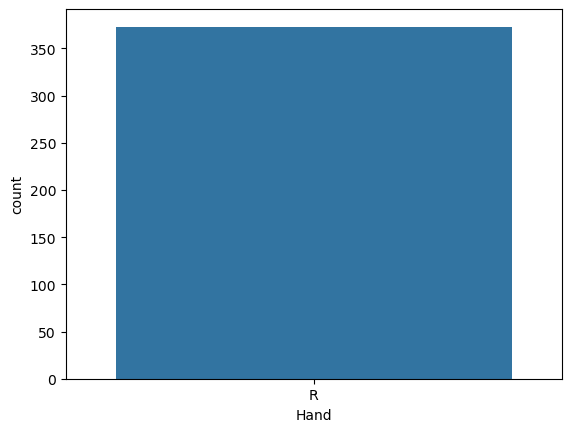

SES
SES
2.0    122
1.0     88
3.0     82
4.0     74
5.0      7
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


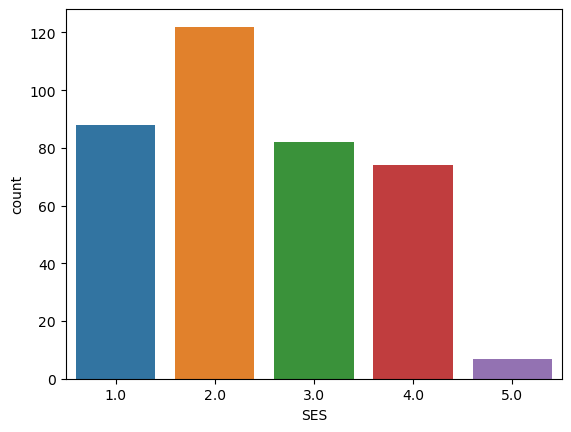

MMSE
MMSE
30.0    116
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
21.0     11
23.0     11
22.0      7
20.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


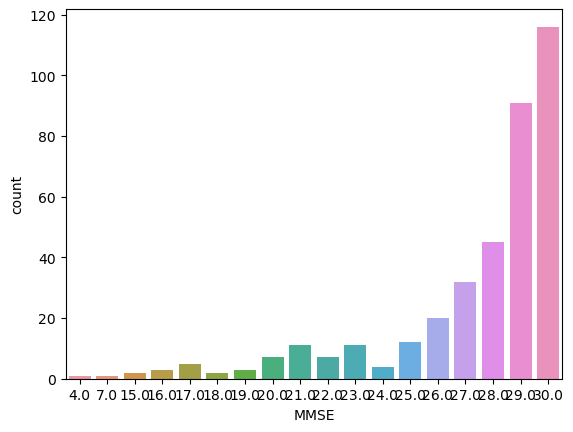

CDR
CDR
0.0    206
0.5    123
1.0     41
2.0      3
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


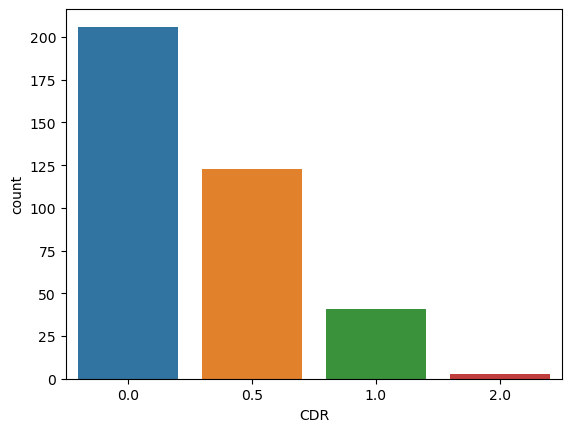

In [35]:
cats=['Subject ID','Group','Visit','M/F','Hand','SES','MMSE','CDR']
for i in cats:
    print(i)
    print(df[i].value_counts())
    print(sns.countplot(x=df[i]))
    plt.show()

In [36]:
df.head()

Subject ID         MRI ID        Group  Visit   MR Delay M/F Hand  Age  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1   0.000000   M    R   87   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2   7.616667   M    R   88   
2  OAS2_0002  OAS2_0002_MR1     Demented      1   0.000000   M    R   75   
3  OAS2_0002  OAS2_0002_MR2     Demented      2   9.333333   M    R   76   
4  OAS2_0002  OAS2_0002_MR3     Demented      3  31.583333   M    R   80   

   EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0    14  2.0  27.0  0.0  1987  0.696  0.883    0 days 00:00:00  
1    14  2.0  30.0  0.0  2004  0.681  0.876    0 days 07:37:00  
2    12  2.0  23.0  0.5  1678  0.736  1.046    0 days 00:00:00  
3    12  2.0  28.0  0.5  1738  0.713  1.010    0 days 09:20:00  
4    12  2.0  22.0  0.5  1698  0.701  1.034    1 days 07:35:00

Subject ID, MRL ID are almost unique,
and Hand is compltely right in all records

therefore for analysing the and data modeling these records are not considered

In [37]:
df['Subject ID'].nunique()

150

In [38]:
df['MRI ID'].nunique()

373

In [39]:
df.Hand.value_counts()

Hand
R    373
Name: count, dtype: int64

### Group

In [40]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [41]:
df.Group.value_counts(normalize=True)*100

Group
Nondemented    50.938338
Demented       39.142091
Converted       9.919571
Name: proportion, dtype: float64

Text(0.5, 1.0, 'distribution of subjects')

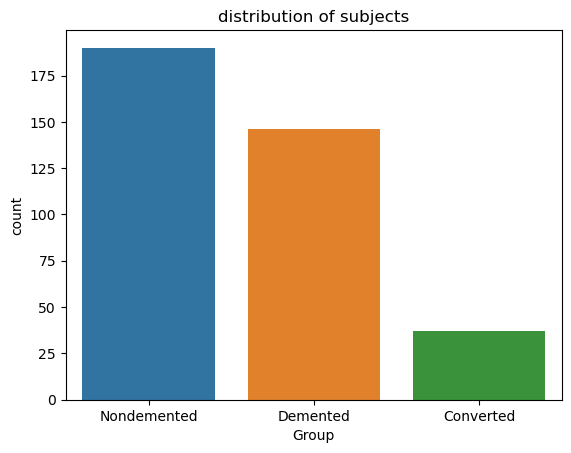

In [42]:
sns.countplot(x=df.Group)
plt.title('distribution of subjects')

### Visit vs Group

In [43]:
df.groupby('Group')['Visit'].mean()

Group
Converted      2.027027
Demented       1.732877
Nondemented    1.968421
Name: Visit, dtype: float64

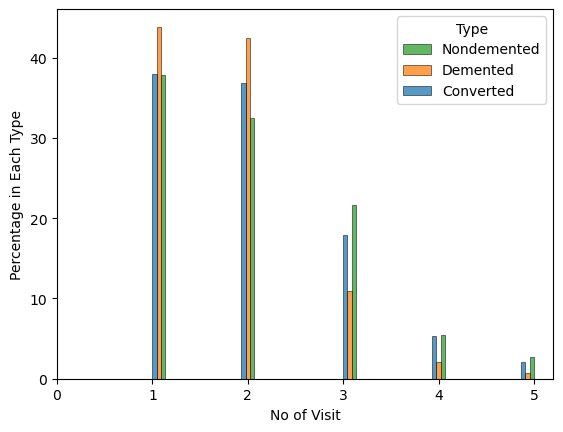

In [44]:
sns.histplot(x = 'Visit',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('No of Visit')
plt.ylabel('Percentage in Each Type')
plt.xticks(np.arange(0,6,1))
plt.legend(title = 'Type', labels = ['Nondemented','Demented','Converted'])

converted people visited most no of times

### MR Delay vs Group

In [45]:
df.groupby('MR Delay')['Visit'].mean()

MR Delay
0.000000     1.0
3.033333     2.0
3.533333     2.0
4.133333     2.0
5.866667     2.0
            ... 
39.766667    5.0
40.000000    5.0
41.800000    4.0
41.950000    5.0
43.983333    5.0
Name: Visit, Length: 201, dtype: float64

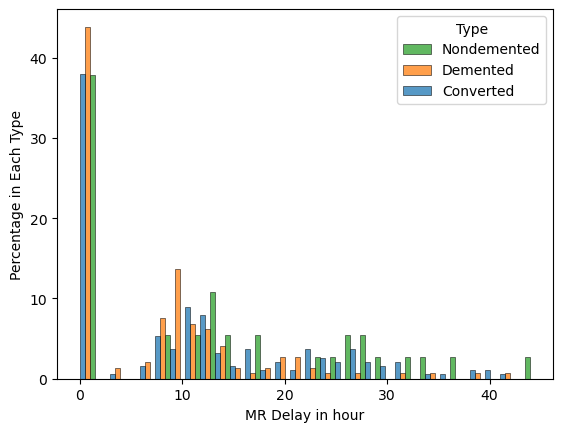

In [46]:
sns.histplot(x = 'MR Delay',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('MR Delay in hour')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['Nondemented','Demented','Converted'])

By above we can conclude that most of MRI scanning reports came within one hour, and apart from that report are almost with 15hours dealy

### Gender vs Group

In [47]:
df['M/F'].unique()

array(['M', 'F'], dtype=object)

In [48]:
df.rename({'M/F':'Gender'},inplace=True)

In [49]:
df.groupby('Group')['M/F'].value_counts()

Group        M/F
Converted    F       24
             M       13
Demented     M       86
             F       60
Nondemented  F      129
             M       61
Name: count, dtype: int64

M/F
F    57.104558
M    42.895442
Name: proportion, dtype: float64

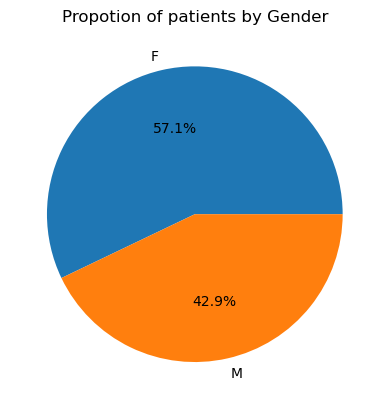

In [50]:

gender_count = df['M/F'].value_counts()
display(df['M/F'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(gender_count,labels = gender_count.index,autopct = '%1.1f%%')
plt.title('Propotion of patients by Gender')
plt.show()

In the dataset, there's a slightly higher proportion of females 57.1% has seen the ads compared to males 42.9%, indicating higher female are subjected for testing.







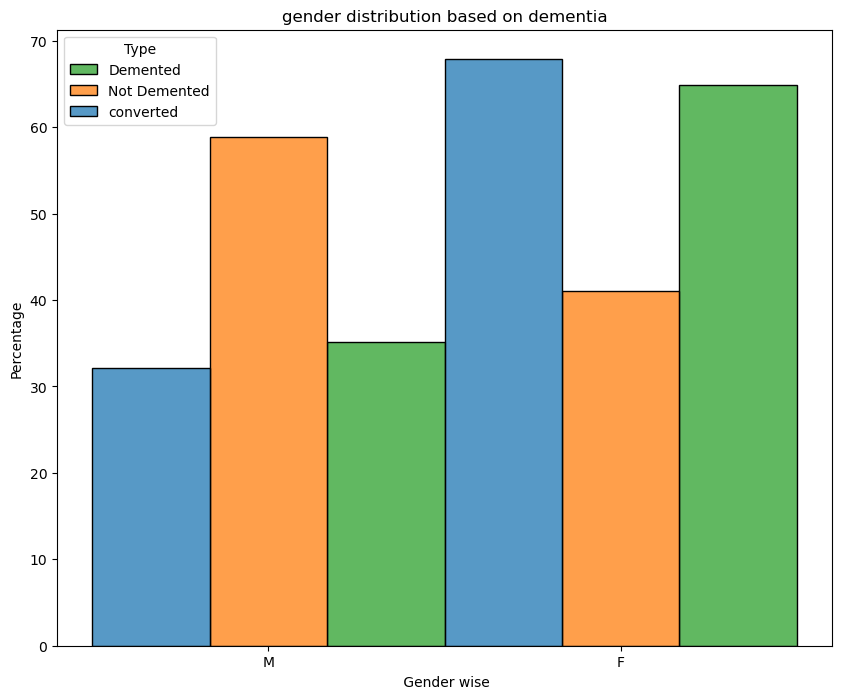

In [51]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'M/F',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel(' Gender wise')
plt.ylabel('Percentage')
plt.title('gender distribution based on dementia')
plt.xticks(np.arange(0,2,1))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','converted'],loc='best')


The distribution indicates that females have a higher likelihood of developing Alzheimer's disease, and the data shows that a greater number of female subjects are affected by Alzheimer's compared to males.

### Age vs Group

In [52]:
df.Age.unique()

array([87, 88, 75, 76, 80, 90, 83, 85, 71, 73, 93, 95, 68, 69, 66, 78, 81,
       82, 77, 86, 92, 84, 72, 61, 64, 74, 60, 62, 91, 79, 89, 70, 94, 97,
       65, 67, 63, 96, 98])

In [53]:
df.Age.min()

60

In [54]:
df.groupby('Group').Age.mean()

Group
Converted      79.756757
Demented       76.260274
Nondemented    77.057895
Name: Age, dtype: float64

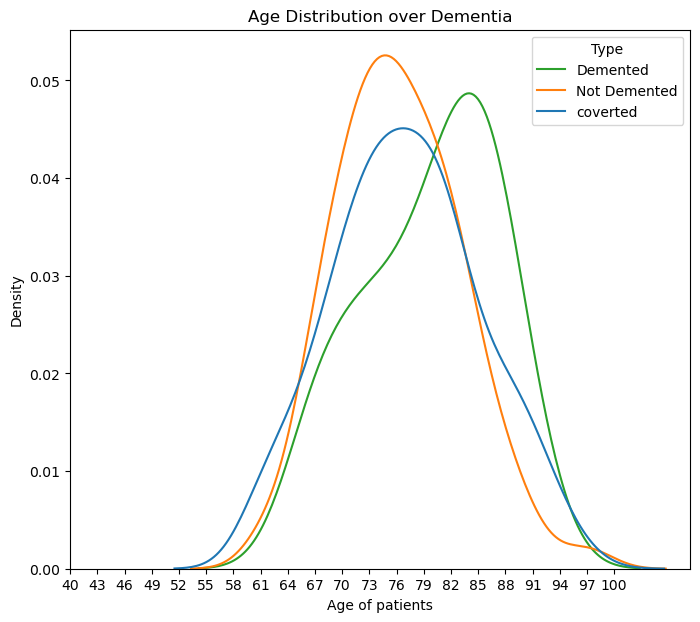

In [55]:
plt.figure(figsize=(8,7))
sns.kdeplot(x = 'Age',data = df,hue = 'Group',common_norm = False)
plt.xlabel('Age of patients')
plt.ylabel('Density')
plt.xticks(np.arange(40,103,3))
plt.title('Age Distribution over Dementia')
plt.legend(title = 'Type', labels = ['Demented','Not Demented','coverted'])

As we know, Alzheimer's disease generally affects older adults, with people above the age of 70 being more susceptible.

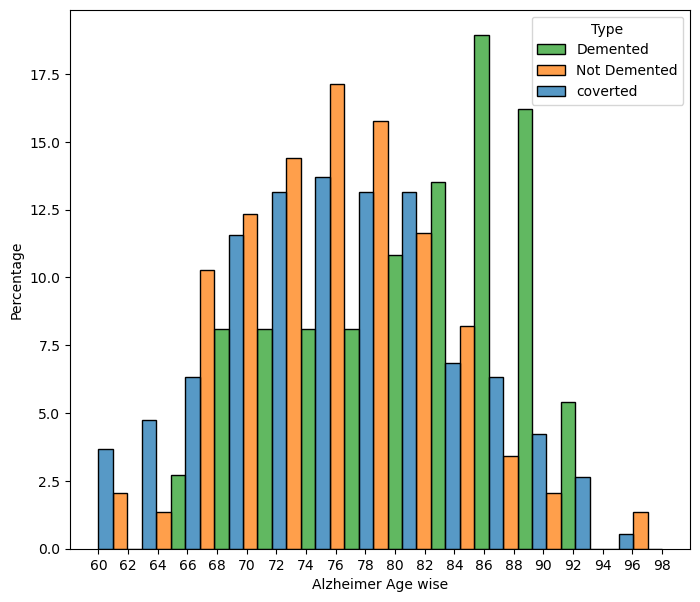

In [56]:
plt.figure(figsize=(8,7))
sns.histplot(x = 'Age',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel('Alzheimer Age wise')
plt.ylabel('Percentage')
plt.xticks(np.arange(60,100,2))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


The highest age group in the dataset includes individuals aged 86 to 89 years.

In [57]:
df.head(1)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1       0.0   M    R   87    14   

   SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0  2.0  27.0  0.0  1987  0.696  0.883             0 days

### EDUC vs Group

In [58]:
df.EDUC.nunique()

12

In [59]:
df.groupby('Group').EDUC.max()

Group
Converted      20
Demented       20
Nondemented    23
Name: EDUC, dtype: int64

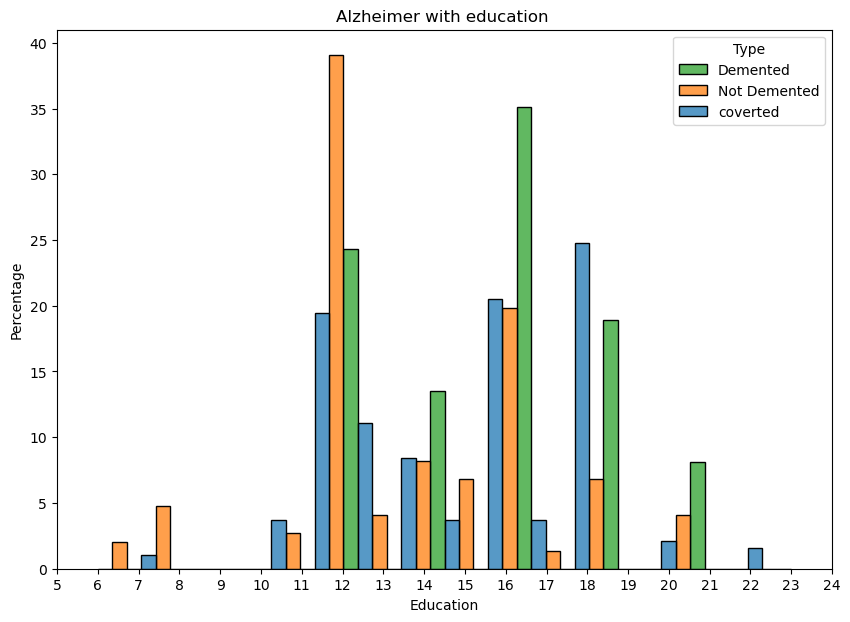

In [60]:
plt.figure(figsize=(10,7))
sns.histplot(x = 'EDUC',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.title('Alzheimer with education ')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.xticks(np.arange(5,25,1))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


More educated individuals tend to have a higher risk of developing Alzheimer's disease

### SES vs Group

In [61]:
df.SES.nunique()

5

In [62]:
df.groupby('Group').SES.value_counts()

Group        SES
Converted    1.0    21
             2.0     7
             3.0     7
             4.0     2
Demented     2.0    44
             4.0    38
             3.0    33
             1.0    26
             5.0     5
Nondemented  2.0    71
             3.0    42
             1.0    41
             4.0    34
             5.0     2
Name: count, dtype: int64

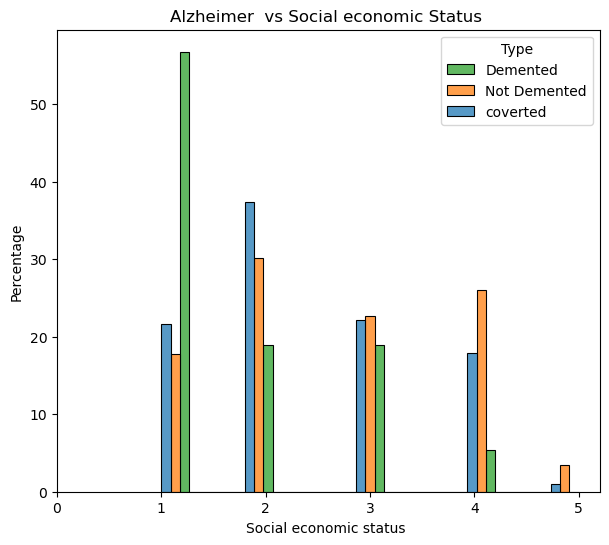

In [63]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'SES',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.title('Alzheimer  vs Social economic Status ')
plt.xlabel('Social economic status ')
plt.ylabel('Percentage')
plt.xticks(np.arange(0,6,1))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


Individuals with a socioeconomic status of 1i.e., low SES (poor) exhibit a higher prevalence of Alzheimer's disease

### CDR vs Group

In [64]:
df.CDR.nunique()

4

In [65]:
df.groupby('Group').CDR.value_counts()

Group        CDR
Converted    0.5     19
             0.0     18
Demented     0.5    102
             1.0     41
             2.0      3
Nondemented  0.0    188
             0.5      2
Name: count, dtype: int64

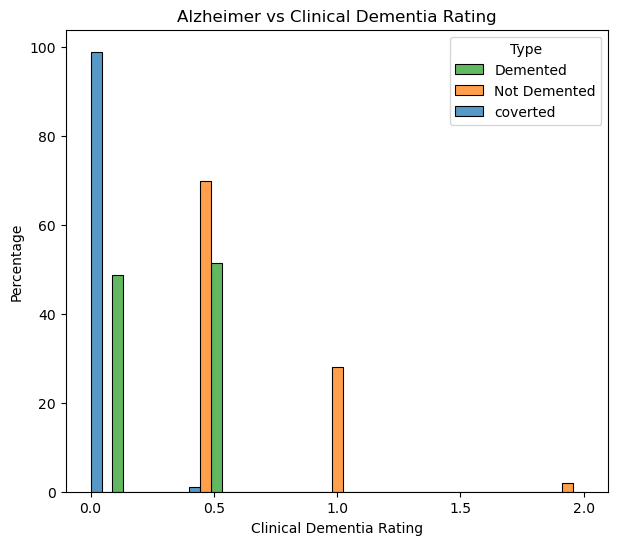

In [66]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'CDR',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.title('Alzheimer vs Clinical Dementia Rating')
plt.xlabel('Clinical Dementia Rating')
plt.ylabel('Percentage')
plt.xticks(np.arange(0,2.5,0.5))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


Individuals with a Clinical Dementia Rating (CDR) score less than 1 are more likely conberted to dementia
And subjects in the datasets are having mild dementia 


### eTIV vs Group

In [67]:
df.eTIV.nunique()

286

In [68]:
df.eTIV.max()

2004

In [69]:
df.eTIV.min()

1106

In [70]:
df.groupby('Group').eTIV.value_counts()

Group        eTIV
Converted    1423    2
             1398    2
             1404    2
             1264    1
             1495    1
                    ..
Nondemented  1191    1
             1165    1
             1154    1
             1106    1
             2004    1
Name: count, Length: 326, dtype: int64

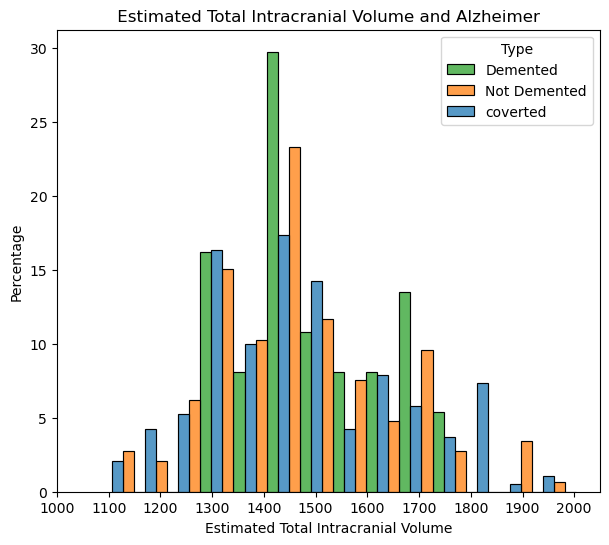

In [71]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'eTIV',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.title(' Estimated Total Intracranial Volume and Alzheimer ')
plt.xlabel('Estimated Total Intracranial Volume')
plt.ylabel('Percentage')
plt.xticks(np.arange(1000,2006,100))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


Having an Estimated Total Intracranial Volume (eTIV) of 1400 alone does not necessarily indicate a high chance of Alzheimer's disease. Alzheimer's risk is influenced by various factors, including age, genetics, education level, and cognitive function. While certain studies may suggest correlations between eTIV and Alzheimer's risk, eTIV alone is not a definitive predictor of the disease.

### nWBV vs Group

In [72]:
df.nWBV.nunique()

136

In [73]:
df.groupby('Group').nWBV.value_counts()

Group        nWBV 
Converted    0.696    3
             0.731    2
             0.771    2
             0.666    1
             0.760    1
                     ..
Nondemented  0.682    1
             0.684    1
             0.688    1
             0.689    1
             0.837    1
Name: count, Length: 220, dtype: int64

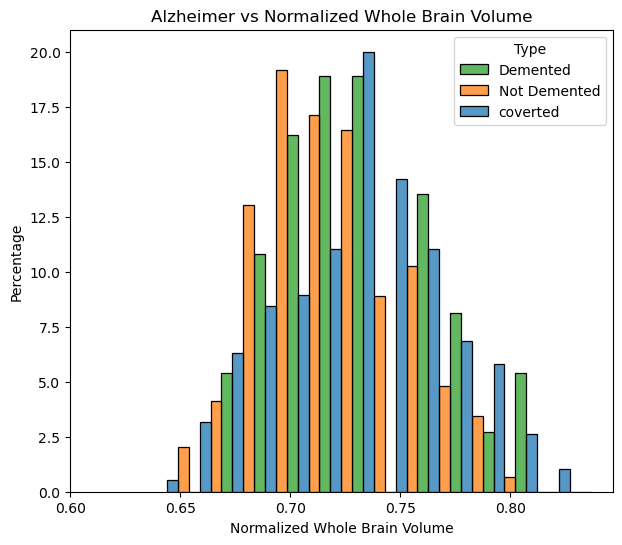

In [74]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'nWBV',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.title('Alzheimer vs Normalized Whole Brain Volume')
plt.xlabel('Normalized Whole Brain Volume')
plt.ylabel('Percentage')
plt.xticks(np.arange(0.6,0.85,0.05))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


Individuals with a Normalized Whole Brain Volume (nWBV) value above 0.7 have a higher chance of developing dementia. Normalized Whole Brain Volume is a measure used to compare brain volumes across different individuals by normalizing against the total intracranial volume, with values typically ranging from 0.5 to 0.9. higher nWBV values, especially above 0.7, are often associated with increased risk of dementia due to greater brain atrophy.

### ASF vs Group

In [75]:
df.ASF.nunique()

265

In [76]:
df.groupby('Group').ASF.value_counts()

Group        ASF  
Converted    1.250    2
             1.255    2
             1.019    1
             1.106    1
             1.215    1
                     ..
Nondemented  0.950    1
             0.909    1
             0.883    1
             0.876    1
             1.587    1
Name: count, Length: 317, dtype: int64

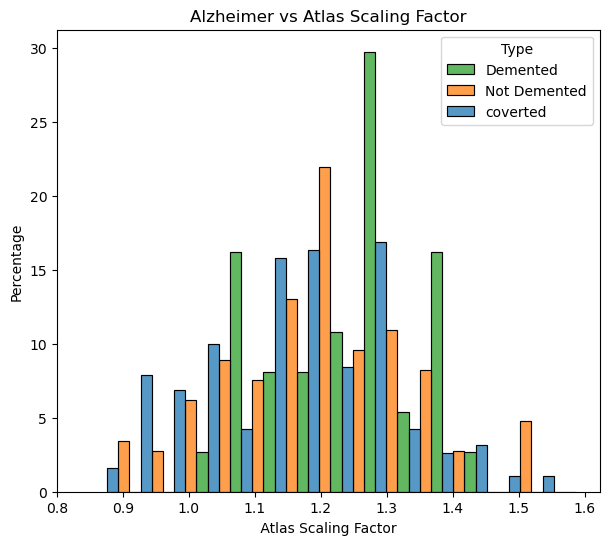

In [77]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'ASF',data = df,hue = 'Group',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel(' Atlas Scaling Factor ')
plt.title("Alzheimer vs Atlas Scaling Factor")
plt.ylabel('Percentage')
plt.xticks(np.arange(0.8,1.65,0.1))
plt.legend(title = 'Type',labels = ['Demented','Not Demented','coverted'],loc='best')


An Alzheimer's Atlas Scaling Factor (ASF) below or above 1.2 is associated with dementia. The Alzheimer's Atlas Scaling Factor typically ranges around **1.0**, with values indicating the degree of scaling needed to fit an individual's MRI to a standard brain template. Significant deviations from 1.0, particularly values below or above 1.2, may be indicative of brain volume abnormalities associated with dementia.

### Correlation

In [78]:
cols = df.describe().columns.to_list() 
cols

['Visit',
 'MR Delay',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'CDR',
 'eTIV',
 'nWBV',
 'ASF',
 'MR_Delay_Timedelta']

<Axes: >

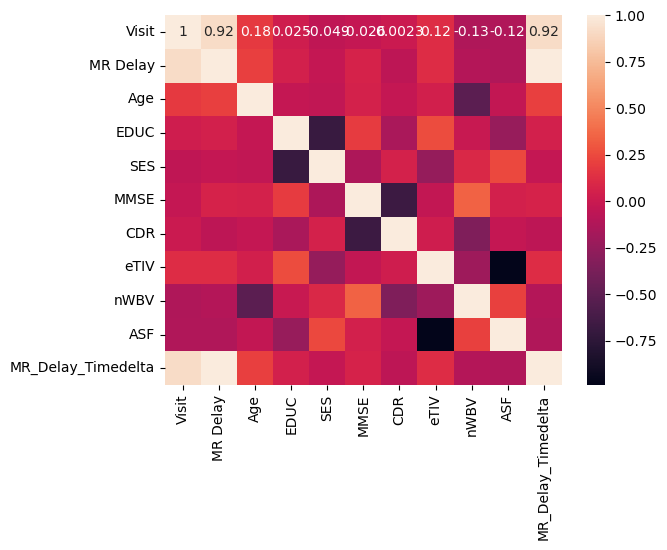

In [79]:
sns.heatmap(df[cols].corr(),annot = True)

In [80]:
remove_elements=['MR Delay','eTIV','EDUC','MR_Delay_Timedelta','MMSE']
cols
for i in remove_elements:
    if i in cols:
        cols.remove(i)
print(cols)        

['Visit', 'Age', 'SES', 'CDR', 'nWBV', 'ASF']


In [81]:
cols

['Visit', 'Age', 'SES', 'CDR', 'nWBV', 'ASF']

<Axes: >

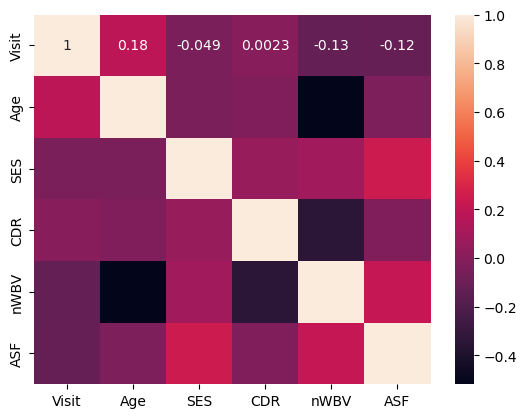

In [82]:
sns.heatmap(df[cols].corr(),annot = True)

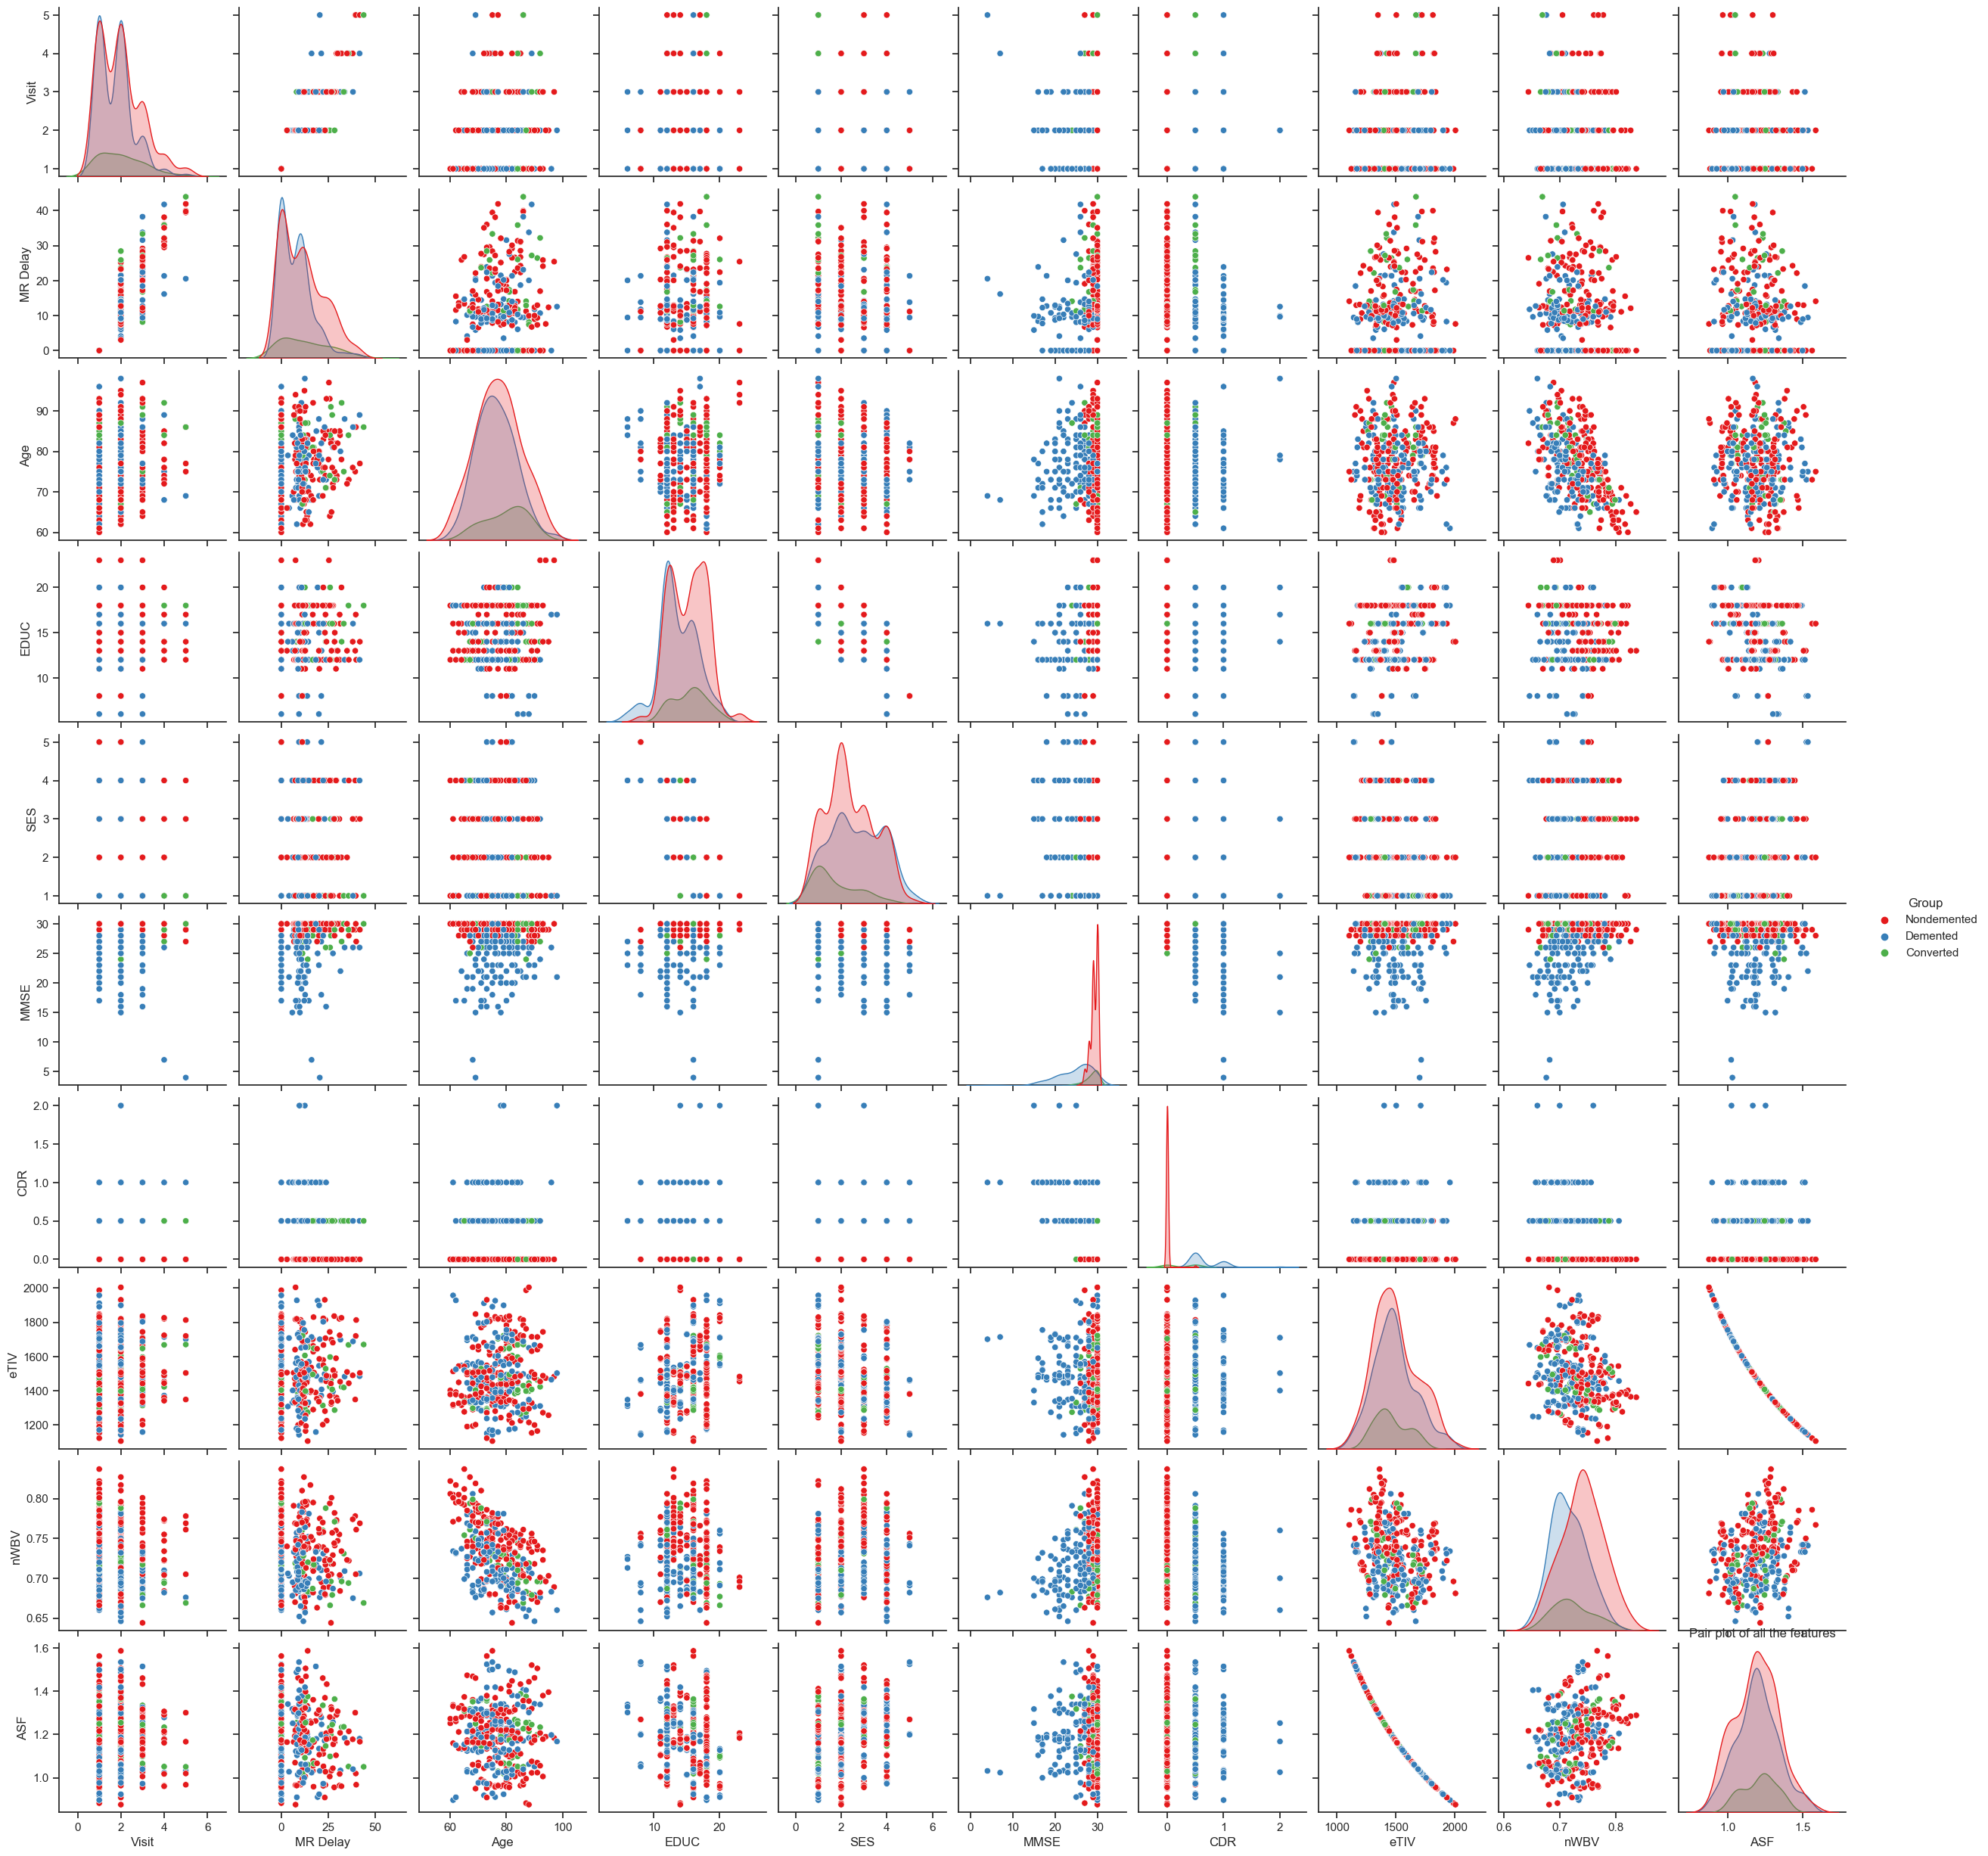

In [83]:
sns.set(style='ticks',palette='Set1')
sns.pairplot(data=df,hue='Group')
plt.title("Pair plot of all the features")
plt.show()

## Model Building 

In [84]:
df.head(2)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1  0.000000   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2  7.616667   M    R   88    14   

   SES  MMSE  CDR  eTIV   nWBV    ASF MR_Delay_Timedelta  
0  2.0  27.0  0.0  1987  0.696  0.883    0 days 00:00:00  
1  2.0  30.0  0.0  2004  0.681  0.876    0 days 07:37:00

In [85]:
df1=df.drop(['Subject ID','MRI ID','MR_Delay_Timedelta','MR Delay','Hand','EDUC','eTIV','MMSE'],axis=1)
df1.head(2)

Group  Visit M/F  Age  SES  CDR   nWBV    ASF
0  Nondemented      1   M   87  2.0  0.0  0.696  0.883
1  Nondemented      2   M   88  2.0  0.0  0.681  0.876

In [86]:
df1.Group.replace({'Nondemented':0,'Demented':1,'Converted':2},inplace=True)

In [87]:
df1.head()

Group  Visit M/F  Age  SES  CDR   nWBV    ASF
0      0      1   M   87  2.0  0.0  0.696  0.883
1      0      2   M   88  2.0  0.0  0.681  0.876
2      1      1   M   75  2.0  0.5  0.736  1.046
3      1      2   M   76  2.0  0.5  0.713  1.010
4      1      3   M   80  2.0  0.5  0.701  1.034

In [88]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [89]:
df1=pd.get_dummies(df1,drop_first=True).astype('int')

In [90]:
df1

Group  Visit  Age  SES  CDR  nWBV  ASF  M/F_M
0        0      1   87    2    0     0    0      1
1        0      2   88    2    0     0    0      1
2        1      1   75    2    0     0    1      1
3        1      2   76    2    0     0    1      1
4        1      3   80    2    0     0    1      1
..     ...    ...  ...  ...  ...   ...  ...    ...
368      1      2   82    1    0     0    1      1
369      1      3   86    1    0     0    1      1
370      0      1   61    2    0     0    1      0
371      0      2   63    2    0     0    1      0
372      0      3   65    2    0     0    1      0

[373 rows x 8 columns]

### Splitting the DataFrame

In [91]:
X=df1.drop('Group',axis=1)
y=df.Group

In [92]:
X.head(2)

Visit  Age  SES  CDR  nWBV  ASF  M/F_M
0      1   87    2    0     0    0      1
1      2   88    2    0     0    0      1

## Random Over Sampling

In [93]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_ros.value_counts())

original dataset shape: Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
Resample dataset shape Group
Nondemented    190
Demented       190
Converted      190
Name: count, dtype: int64


### Train test spilt

In [94]:
X_train,X_test,y_train,y_test=train_test_split(x_ros, y_ros,test_size=0.3,random_state=0)

print('X_train.shape:',X_train.shape, ' X_test.shape:',X_test.shape,'y_train.shape:', y_train.shape,'y_test.shape', y_test.shape)

X_train.shape: (399, 7)  X_test.shape: (171, 7) y_train.shape: (399,) y_test.shape (171,)


### Scaling

In [95]:
#StandardScaler

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Logistic regression

In [96]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()


Logistic Regression Classifier :
Accuracy_train: 0.6616541353383458
Classification Report:
              precision    recall  f1-score   support

   Converted       0.64      0.85      0.73       134
    Demented       0.79      0.66      0.72       132
 Nondemented       0.57      0.47      0.52       133

    accuracy                           0.66       399
   macro avg       0.67      0.66      0.66       399
weighted avg       0.67      0.66      0.66       399


Logistic Regression Classifier :
Accuracy_test: 0.6491228070175439
Classification Report:
              precision    recall  f1-score   support

   Converted       0.62      0.79      0.69        56
    Demented       0.82      0.64      0.72        58
 Nondemented       0.55      0.53      0.54        57

    accuracy                           0.65       171
   macro avg       0.66      0.65      0.65       171
weighted avg       0.66      0.65      0.65       171



LogisticRegression()

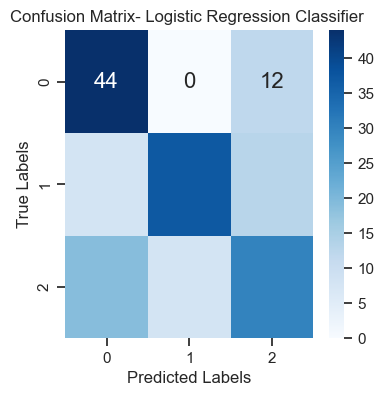

In [97]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

y_train_pred_proba=lr.predict_proba(X_train)
y_test_pred_proba=lr.predict_proba(X_test)[:,1]

accuracy_train=accuracy_score(y_train,y_train_pred)
accuracy_test=accuracy_score(y_test,y_test_pred)

cm_train=confusion_matrix(y_train,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)

cr_train=classification_report(y_train,y_train_pred)
cr_test=classification_report(y_test,y_test_pred)

print("\nLogistic Regression Classifier :")
print(f"Accuracy_train: {accuracy_train}")
print("Classification Report:")
print(classification_report(y_train,y_train_pred))

print("\nLogistic Regression Classifier :")
print(f"Accuracy_test: {accuracy_test}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')### Logistic regression

#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

In [98]:
print(confusion_matrix(y_test, y_test_pred))

[[44  0 12]
 [ 8 37 13]
 [19  8 30]]


### Random Forest

In [99]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results
Parameters = {
    'n_estimators': [ 100 , 300 , 500 ], # Number of trees in the forest
    'max_depth': [None, 5 , 10 , 15 ], # Maximum depth of each tree
    'min_samples_split': [ 5 , 10 , 15]  # Minimum number of samples required to split an internal node    
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier ( )
# Perform grid search with cross-validation
grid_search = GridSearchCV ( rf, Parameters, cv = 5)
grid_search.fit ( X_train ,y_train )
Params = grid_search.best_params_
# Training model for each combination of the parameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}

Best Accuracy Score:  0.7844620253164557



Random Forest Classifier:
Accuracy_train: 0.9598997493734336
Classification Report:
              precision    recall  f1-score   support

   Converted       0.94      0.98      0.96       134
    Demented       0.98      0.95      0.96       132
 Nondemented       0.96      0.95      0.96       133

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399


Random Forest Classifier :
Accuracy_test: 0.7251461988304093
Classification Report:
              precision    recall  f1-score   support

   Converted       0.79      0.82      0.81        56
    Demented       0.73      0.66      0.69        58
 Nondemented       0.66      0.70      0.68        57

    accuracy                           0.73       171
   macro avg       0.73      0.73      0.73       171
weighted avg       0.73      0.73      0.72       171



Text(0.5, 1.0, 'Confusion Matrix- Random Forest Classifier ')

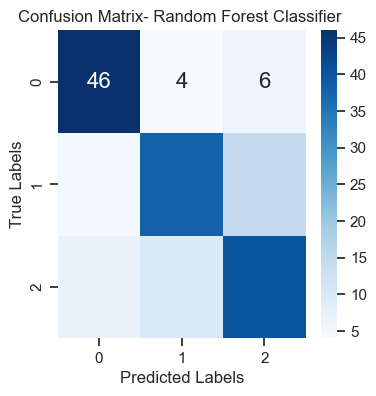

In [100]:
rf.fit(X_train,y_train)

y_train_predrf=rf.predict(X_train)
y_test_predrf=rf.predict(X_test)

y_train_pred_probarf=rf.predict_proba(X_train)
y_test_pred_probarf=rf.predict_proba(X_test)[:,1]

accuracy_trainrf=accuracy_score(y_train,y_train_predrf)
accuracy_testrf=accuracy_score(y_test,y_test_predrf)

cm_trainrf=confusion_matrix(y_train,y_train_predrf)
cm_testrf=confusion_matrix(y_test,y_test_predrf)

cr_trainrf=classification_report(y_train,y_train_predrf)
cr_testrf=classification_report(y_test,y_test_predrf)

print("\nRandom Forest Classifier:")
print(f"Accuracy_train: {accuracy_trainrf}")
print("Classification Report:")
print(classification_report(y_train,y_train_predrf))

print("\nRandom Forest Classifier :")
print(f"Accuracy_test: {accuracy_testrf}")
print("Classification Report:")
print(classification_report(y_test, y_test_predrf))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_testrf, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Random Forest Classifier ')

In [101]:
print(confusion_matrix(y_test,y_test_predrf))

[[46  4  6]
 [ 5 38 15]
 [ 7 10 40]]


### Decision Tree

In [102]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [ 5, 10],
 }


# Initializing the algorithm
DT = DecisionTreeClassifier()

# Performing grid search, which finds the appropriate parameter iteratively.
grid_search = GridSearchCV( DT, Parameters, cv = 5 )
grid_search.fit(X_train ,y_train)
Params = grid_search.best_params_

# Printing the best parameters 
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}

Best Accuracy Score:  0.7593037974683543



Decision Tree Classifier:
Accuracy_train: 0.9598997493734336
Classification Report:
              precision    recall  f1-score   support

   Converted       0.92      1.00      0.96       134
    Demented       0.98      0.95      0.97       132
 Nondemented       0.98      0.93      0.96       133

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399


Decision Tree Classifier :
Accuracy_test: 0.7719298245614035
Classification Report:
              precision    recall  f1-score   support

   Converted       0.84      0.91      0.87        56
    Demented       0.78      0.69      0.73        58
 Nondemented       0.69      0.72      0.71        57

    accuracy                           0.77       171
   macro avg       0.77      0.77      0.77       171
weighted avg       0.77      0.77      0.77       171



Text(0.5, 1.0, 'Confusion Matrix- Decicion Tree Classifier ')

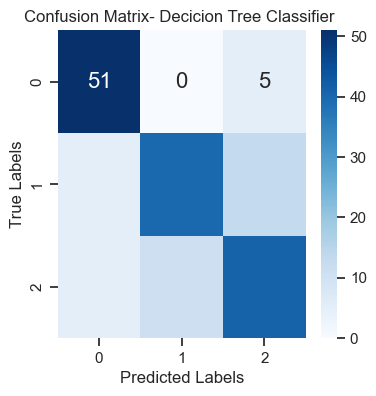

In [103]:
DT.fit(X_train,y_train)

y_train_preddt=DT.predict(X_train)
y_test_preddt=DT.predict(X_test)

y_train_pred_probadt=DT.predict_proba(X_train)
y_test_pred_probadt=DT.predict_proba(X_test)[:,1]

accuracy_traindt=accuracy_score(y_train,y_train_preddt)
accuracy_testdt=accuracy_score(y_test,y_test_preddt)

cm_traindt=confusion_matrix(y_train,y_train_preddt)
cm_testdt=confusion_matrix(y_test,y_test_preddt)

cr_traindt=classification_report(y_train,y_train_preddt)
cr_testdt=classification_report(y_test,y_test_preddt)

print("\nDecision Tree Classifier:")
print(f"Accuracy_train: {accuracy_traindt}")
print("Classification Report:")
print(classification_report(y_train,y_train_preddt))

print("\nDecision Tree Classifier :")
print(f"Accuracy_test: {accuracy_testdt}")
print("Classification Report:")
print(classification_report(y_test, y_test_preddt))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_testdt, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decicion Tree Classifier ')

In [104]:
print(confusion_matrix(y_test, y_test_preddt))

[[51  0  5]
 [ 5 40 13]
 [ 5 11 41]]


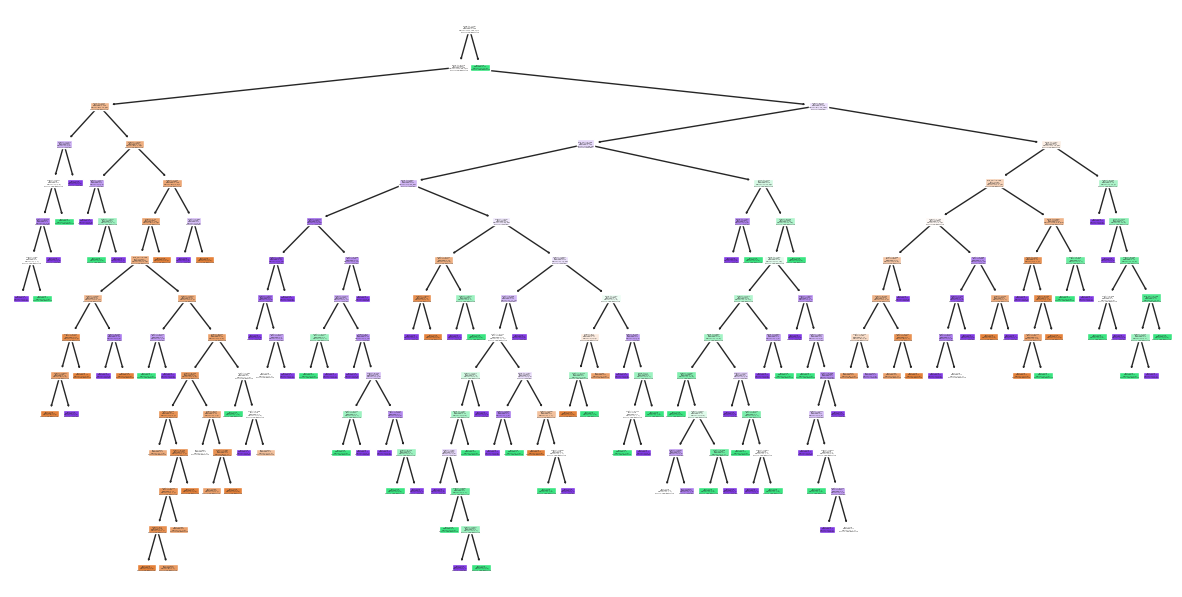

<Figure size 640x480 with 0 Axes>

In [105]:
# Note will plot the tree and see its depth
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(DT,filled=True,class_names=['No dementia','Yes dementia','coverted'],feature_names=X.columns.to_list())
plt.show()
plt.savefig('new_image.jpg')


In [106]:
a=DT.cost_complexity_pruning_path(X_train,y_train)
a

{'ccp_alphas': array([0.        , 0.00033417, 0.00041012, 0.00041771, 0.00044556,
        0.00044556, 0.00058713, 0.00071608, 0.00083542, 0.00100251,
        0.00127302, 0.00167084, 0.00167084, 0.00167874, 0.00168278,
        0.0018797 , 0.0018797 , 0.00200501, 0.00227842, 0.00234962,
        0.00250627, 0.00263158, 0.00281955, 0.00300752, 0.00304122,
        0.00334169, 0.00334169, 0.00334169, 0.00334169, 0.00334169,
        0.00334169, 0.0034065 , 0.00346828, 0.0037594 , 0.0037594 ,
        0.00383319, 0.00401003, 0.00410749, 0.00444125, 0.00451128,
        0.00461153, 0.00475077, 0.00483026, 0.00509873, 0.00546022,
        0.00601504, 0.00605084, 0.00639694, 0.00688286, 0.00692919,
        0.00757021, 0.00780798, 0.00811131, 0.00825156, 0.0099372 ,
        0.01030941, 0.01264456, 0.0128185 , 0.01472934, 0.01896125,
        0.06285581, 0.08325194]),
 'impurities': array([0.0540518 , 0.05438596, 0.0552062 , 0.05562391, 0.05606947,
        0.05651502, 0.05710216, 0.05925038, 0.06008581

In [107]:
a['ccp_alphas'][0:-1]

array([0.        , 0.00033417, 0.00041012, 0.00041771, 0.00044556,
       0.00044556, 0.00058713, 0.00071608, 0.00083542, 0.00100251,
       0.00127302, 0.00167084, 0.00167084, 0.00167874, 0.00168278,
       0.0018797 , 0.0018797 , 0.00200501, 0.00227842, 0.00234962,
       0.00250627, 0.00263158, 0.00281955, 0.00300752, 0.00304122,
       0.00334169, 0.00334169, 0.00334169, 0.00334169, 0.00334169,
       0.00334169, 0.0034065 , 0.00346828, 0.0037594 , 0.0037594 ,
       0.00383319, 0.00401003, 0.00410749, 0.00444125, 0.00451128,
       0.00461153, 0.00475077, 0.00483026, 0.00509873, 0.00546022,
       0.00601504, 0.00605084, 0.00639694, 0.00688286, 0.00692919,
       0.00757021, 0.00780798, 0.00811131, 0.00825156, 0.0099372 ,
       0.01030941, 0.01264456, 0.0128185 , 0.01472934, 0.01896125,
       0.06285581])

In [108]:
path=DT.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-2]

In [109]:
len(ccp_alphas)

60

In [110]:
models=[]

for i in ccp_alphas:
    model=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model.fit(X_train,y_train)
    models.append(model)
    
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033416875522138817, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004101161995898831, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004177109440267335, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00044555834029518307, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00044555834029518307, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0005871321660795344, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0007160759040458292, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.000835421888053467, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001002506265664161, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001336675020885547, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015037593984962407, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001670843776106934, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001670843776106934, random_state=0),

In [111]:
train=[i.score(X_train,y_train)  for i in models]
test=[j.score(X_test,y_test) for j in models]
print(train)
print(test)

[0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9598997493734336, 0.9573934837092731, 0.9573934837092731, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9448621553884712, 0.9448621553884712, 0.9423558897243107, 0.9398496240601504, 0.9373433583959899, 0.9348370927318296, 0.9197994987468672, 0.9147869674185464, 0.9122807017543859, 0.9122807017543859, 0.8922305764411027, 0.8922305764411027, 0.8922305764411027, 0.8922305764411027, 0.8922305764411027, 0.8922305764411027, 0.87468671679198, 0.87468671679198, 0.8696741854636592, 0.8696741854636592, 0.8696741854636592, 0.8571428571428571, 0.849624060150376, 0.8471177944862155, 0.8446115288220551, 0.8395989974937343, 0.8195488721804511, 0.8095238095238095, 0.7969924812030075, 0.7869674185463659, 0.7819548872180451, 0.7769423558897243, 0.7619047619047619, 0.7468671679197995, 0.7418546365914787, 0.73

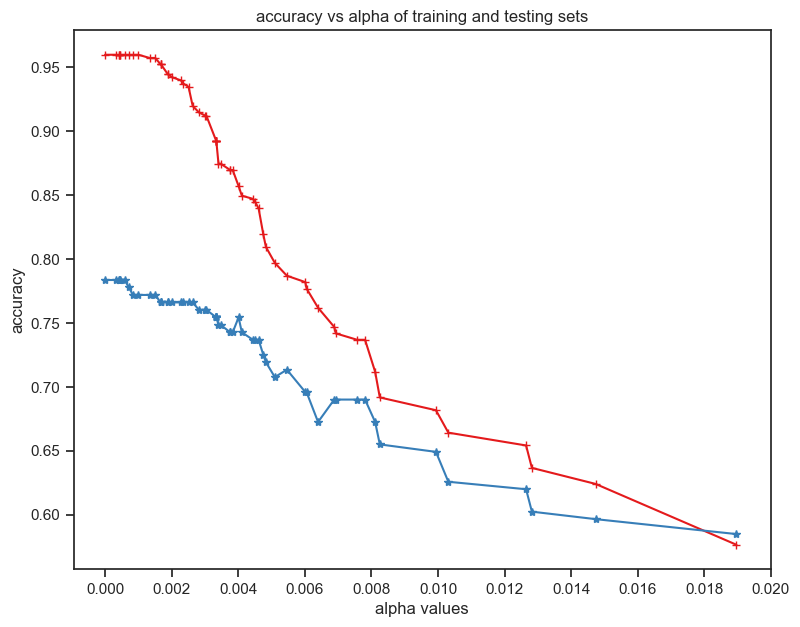

In [112]:
plt.figure(figsize=(9,7))
plt.plot(ccp_alphas,train,marker='+')
plt.plot(ccp_alphas,test,marker='*')
plt.xlabel('alpha values')
plt.ylabel('accuracy')
plt.title('accuracy vs alpha of training and testing sets')
plt.xticks(np.arange(0,0.022,0.002))
plt.show()

ccp_alpha=0.008145363408521303

In [113]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.006)
model3

DecisionTreeClassifier(ccp_alpha=0.006, random_state=42)

In [114]:
model3.fit(X_train,y_train)
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

ytest_pred = model3.predict(X_test)

confusion_matrix(y_test,ytest_pred)

print(classification_report(y_test,ytest_pred))
print(confusion_matrix(y_test,ytest_pred))

Training Score 0.79, Testing Score 0.71
              precision    recall  f1-score   support

   Converted       0.75      0.86      0.80        56
    Demented       0.68      0.72      0.70        58
 Nondemented       0.71      0.56      0.63        57

    accuracy                           0.71       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.71      0.71      0.71       171

[[48  4  4]
 [ 7 42  9]
 [ 9 16 32]]


In [115]:
y_train_pred=model3.predict(X_train)
confusion_matrix(y_train,y_train_pred)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

   Converted       0.82      0.96      0.89       134
    Demented       0.72      0.80      0.76       132
 Nondemented       0.83      0.59      0.69       133

    accuracy                           0.79       399
   macro avg       0.79      0.79      0.78       399
weighted avg       0.79      0.79      0.78       399



In [116]:
from sklearn.model_selection import cross_val_score

<Axes: xlabel='tree'>

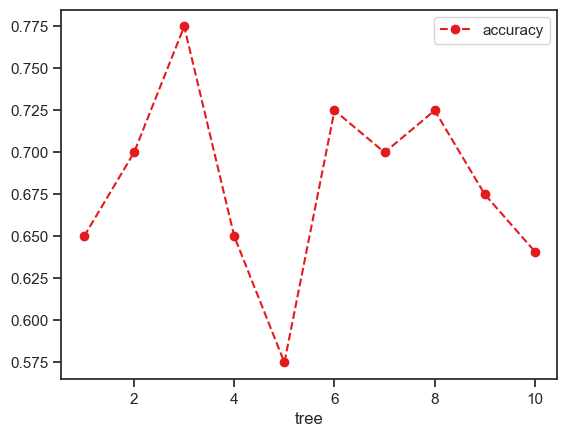

In [117]:
# now use 10-fold cross validation create 10 different training and testing datasets that are then used to train and test tree.
## Note:- We use 10-fold because we don't have tons of data..
scores=cross_val_score(model3,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [118]:
scores.mean()

0.6816025641025641

In [119]:
scores

array([0.65      , 0.7       , 0.775     , 0.65      , 0.575     ,
       0.725     , 0.7       , 0.725     , 0.675     , 0.64102564])

The graph above shows that using different **Training** and **Testing** data with the same alpha resulted in different accuracies, suggesting that alpha is positive to the datasets. So, insted of picking a single **Training** dataset and single **Testing** dataset, let's use **Cross Validation** to find the optimal value or ccp_alpha.

In [120]:
ccp_alphas

array([0.        , 0.00033417, 0.00041012, 0.00041771, 0.00044556,
       0.00044556, 0.00058713, 0.00071608, 0.00083542, 0.00100251,
       0.00133668, 0.00150376, 0.00167084, 0.00167084, 0.00167874,
       0.0018797 , 0.0018797 , 0.00200501, 0.00227842, 0.00234962,
       0.00250627, 0.00263158, 0.00281955, 0.00300752, 0.00304122,
       0.00334169, 0.00334169, 0.00334169, 0.00334169, 0.00334169,
       0.00334169, 0.0034065 , 0.00346828, 0.0037594 , 0.0037594 ,
       0.00383319, 0.00401003, 0.00410749, 0.00444125, 0.00451128,
       0.00461153, 0.00475077, 0.00483026, 0.00509873, 0.00546022,
       0.00601504, 0.00605084, 0.00639694, 0.00688286, 0.00692919,
       0.00757021, 0.00780798, 0.00811131, 0.00825156, 0.0099372 ,
       0.01030941, 0.01264456, 0.0128185 , 0.01472934, 0.01896125])

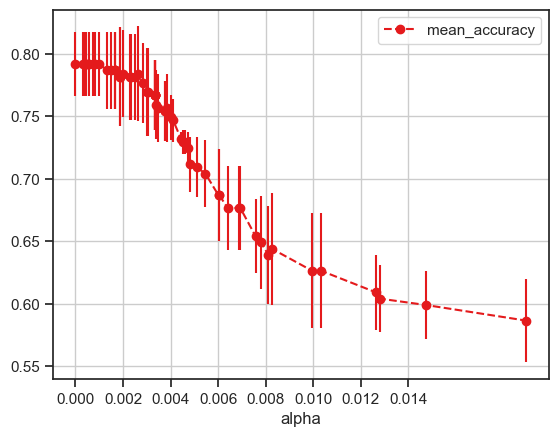

In [121]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for i in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.xticks(np.arange(0,0.015,0.002))
plt.grid()
plt.show()

In [122]:
alpha_results.sort_values('mean_accuracy',ascending=False)

alpha  mean_accuracy       std
0   0.000000       0.791867  0.025601
2   0.000410       0.791867  0.025601
3   0.000418       0.791867  0.025601
4   0.000446       0.791867  0.025601
5   0.000446       0.791867  0.025601
6   0.000587       0.791867  0.025601
7   0.000716       0.791867  0.025601
8   0.000835       0.791867  0.025601
9   0.001003       0.791867  0.025601
1   0.000334       0.791867  0.025601
12  0.001671       0.786835  0.030712
14  0.001679       0.786835  0.030712
13  0.001671       0.786835  0.030712
11  0.001504       0.786835  0.030712
10  0.001337       0.786835  0.030712
17  0.002005       0.784304  0.035149
21  0.002632       0.784304  0.037722
18  0.002278       0.781804  0.034380
19  0.002350       0.781804  0.034380
20  0.002506       0.781804  0.034380
15  0.001880       0.781772  0.039737
16  0.001880       0.781772  0.039737
22  0.002820       0.776804  0.032211
23  0.003008       0.769272  0.035332
24  0.003041       0.769272  0.035332
28  0.003342       0.766804  0.028038
29  0.003342       0.766804  0.028038
30  0.003342       0.766804  0.028038
27  0.003342       0.766804  0.028038
26  0.003342       0.766804  0.028038
25  0.003342       0.766804  0.028038
31  0.003407       0.759304  0.027626
32  0.003468       0.756835  0.027447
35  0.003833       0.756835  0.027447
33  0.003759       0.754335  0.023718
34  0.003759       0.754335  0.023718
36  0.004010       0.749335  0.018190
37  0.004107       0.746835  0.017031
38  0.004441       0.731835  0.005711
39  0.004511       0.729335  0.009581
40  0.004612       0.729335  0.009581
41  0.004751       0.724335  0.013140
42  0.004830       0.711804  0.022012
43  0.005099       0.709304  0.023844
44  0.005460       0.704304  0.026440
45  0.006015       0.686867  0.036878
46  0.006051       0.686867  0.036878
47  0.006397       0.676804  0.033887
48  0.006883       0.676804  0.033887
49  0.006929       0.676804  0.033887
50  0.007570       0.654177  0.029703
51  0.007808       0.649177  0.037404
53  0.008252       0.644146  0.044839
52  0.008111       0.639019  0.038991
54  0.009937       0.626614  0.045970
55  0.010309       0.626614  0.045970
56  0.012645       0.609114  0.029912
57  0.012818       0.604114  0.026663
58  0.014729       0.599082  0.027332
59  0.018961       0.586551  0.033465

In [123]:
model6=DecisionTreeClassifier(random_state=42,ccp_alpha= 0.0028)
model6.fit(X_train,y_train)
y_train_pred=model6.predict(X_train)
y_test_pred=model6.predict(X_test)

display(confusion_matrix(y_train_pred,y_train))
display(confusion_matrix(y_test_pred,y_test))

print(classification_report(y_train_pred,y_train))

print(classification_report(y_test_pred,y_test))


array([[132,   6,   6],
       [  0, 113,   5],
       [  2,  13, 122]])

array([[50,  5,  5],
       [ 0, 38, 10],
       [ 6, 15, 42]])

              precision    recall  f1-score   support

   Converted       0.99      0.92      0.95       144
    Demented       0.86      0.96      0.90       118
 Nondemented       0.92      0.89      0.90       137

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399

              precision    recall  f1-score   support

   Converted       0.89      0.83      0.86        60
    Demented       0.66      0.79      0.72        48
 Nondemented       0.74      0.67      0.70        63

    accuracy                           0.76       171
   macro avg       0.76      0.76      0.76       171
weighted avg       0.77      0.76      0.76       171



In [124]:
## Build and train a new decision tree, only this time use the optimal value for alpha

model5=DecisionTreeClassifier(random_state=42,ccp_alpha= 0.0030)

In [125]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=42)

In [126]:
# Predicting for training and testing 
ytrain_pred = model5.predict(X_train)
ytest_pred = model5.predict(X_test)

In [127]:
# Model Evaluation

train_score = model5.score(X_train,y_train)
test_score = model5.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.91, Testing Score 0.75


In [128]:
confusion_matrix(y_train,ytrain_pred)

array([[132,   0,   2],
       [  6, 111,  15],
       [  6,   5, 122]])

In [129]:
confusion_matrix(y_test,ytest_pred)

array([[50,  0,  6],
       [ 5, 37, 16],
       [ 5, 10, 42]])

In [130]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

   Converted       0.92      0.99      0.95       134
    Demented       0.96      0.84      0.90       132
 Nondemented       0.88      0.92      0.90       133

    accuracy                           0.91       399
   macro avg       0.92      0.91      0.91       399
weighted avg       0.92      0.91      0.91       399



In [131]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

   Converted       0.83      0.89      0.86        56
    Demented       0.79      0.64      0.70        58
 Nondemented       0.66      0.74      0.69        57

    accuracy                           0.75       171
   macro avg       0.76      0.76      0.75       171
weighted avg       0.76      0.75      0.75       171



In [132]:
print(y_test.value_counts())

Group
Demented       58
Nondemented    57
Converted      56
Name: count, dtype: int64


In [133]:
print(y_train.value_counts())

Group
Converted      134
Nondemented    133
Demented       132
Name: count, dtype: int64


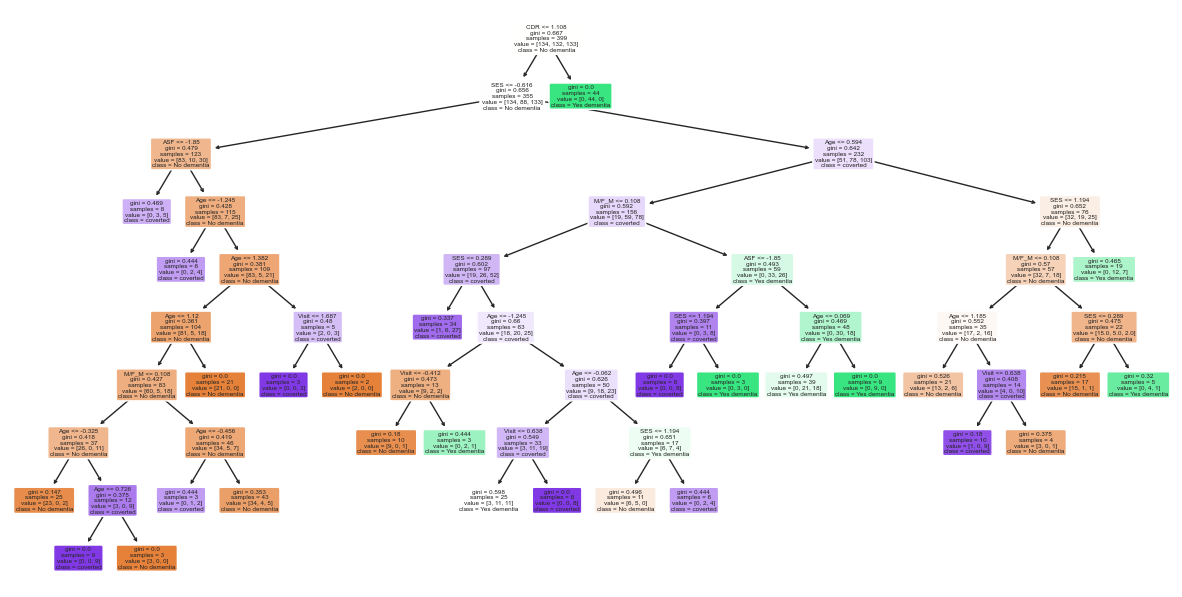

In [134]:
plt.figure(figsize=(15,7.5))
plot_tree(model3,filled=True,rounded=True,class_names=['No dementia','Yes dementia','coverted'],feature_names=X.columns.to_list())
plt.show()

# Deployment 

In [135]:
df1

Group  Visit  Age  SES  CDR  nWBV  ASF  M/F_M
0        0      1   87    2    0     0    0      1
1        0      2   88    2    0     0    0      1
2        1      1   75    2    0     0    1      1
3        1      2   76    2    0     0    1      1
4        1      3   80    2    0     0    1      1
..     ...    ...  ...  ...  ...   ...  ...    ...
368      1      2   82    1    0     0    1      1
369      1      3   86    1    0     0    1      1
370      0      1   61    2    0     0    1      0
371      0      2   63    2    0     0    1      0
372      0      3   65    2    0     0    1      0

[373 rows x 8 columns]

In [145]:
df1.Group.unique()

array([0, 1])

In [147]:
data=df1.copy(deep=True)
data.head()

Group  Visit  Age  SES  CDR  nWBV  ASF  M/F_M
0      0      1   87    2    0     0    0      1
1      0      2   88    2    0     0    0      1
2      1      1   75    2    0     0    1      1
3      1      2   76    2    0     0    1      1
4      1      3   80    2    0     0    1      1

In [160]:
data.to_csv('Alzheimer_data.csv')

## Splitting the dataframe 

In [148]:
X=data.drop('Group',axis=1)
y=data.Group

## Train test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest model

In [150]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
import pickle
#Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [154]:
import streamlit as st

In [155]:
with open('model.pkl', 'rb')as file:
    model=pickle.load(file)

In [157]:
#Define a function to make prediction
def predict(data):
    prediction=model.predict(data)
    return prediction

In [158]:
#streamlit application interface 
st.title("Alzheimer’s  Disease Prediction ")

st.write("Upload your data to get predictions ")

2024-06-16 19:44:53.994 
  command:

    streamlit run /Applications/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
